In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os, sys
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import utils
from pathlib import Path
import mplhep

sys.path.append("../../../analysisTools/")
import plotTools as ptools

In [2]:
def add_signal_info_to_df(df):
    m1_list = []
    delta_list = []
    ctau_list = []
    
    for point in df.index.values:
        sig_dict = ptools.signalPoint(point)
        m1_list.append(sig_dict['m1'])
        delta_list.append(sig_dict['delta'])
        ctau_list.append(sig_dict['ctau'])
    
    df['m1'] = m1_list
    df['delta'] = delta_list
    df['ctau'] = ctau_list
    
    df = df.sort_values(by=['m1']) # sort by m1

    return df

In [3]:
def save_df_to_csv(df, outdir, outname, isSignal = False):
    Path(outdir).mkdir(parents=True, exist_ok=True)

    if isSignal:
        df = add_signal_info_to_df(df)
    
    df.to_csv(f'{outdir}/{outname}.csv')

    print(f'Saved: {outdir}/{outname}.csv')

# Plot 1D: Signal in low-Lxy bin vs. high-Lxy bin

In [4]:
prefix = './coffea/skimmed/'

In [5]:
# Signal
sig_histo_low = util.load(f'{prefix}/SR_ISRcuts_TrueVertex_fewMass_lowLxy.coffea')[0]
sig_histo_high = util.load(f'{prefix}/SR_ISRcuts_TrueVertex_fewMass_highLxy.coffea')[0]

In [6]:
# Background
bkg_files = {
    "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

In [7]:
bkg_histos_low = {}

for b in bkg_files.keys():
    bkg_histos_low[b] = util.load(f'{prefix}/{bkg_files[b]}_SR_ISRcuts_BestVertex_lowLxy.coffea')[0]

In [8]:
bkg_histos_high = {}

for b in bkg_files.keys():
    bkg_histos_high[b] = util.load(f'{prefix}/{bkg_files[b]}_SR_ISRcuts_BestVertex_highLxy.coffea')[0]

In [9]:
utils.get_signal_list_of_cuts(sig_histo_low)

['Preselections',
 '0 < n(jet) < 3 & n(good vertex) > 0',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75',
 'Lxy <= 0.5']

In [10]:
sig_histo_low

{'sel_vtx_vxy': Hist(
   StrCategory(['sig_2018_Mchi-5p5_dMchi-1p0_ctau-100', 'sig_2018_Mchi-5p25_dMchi-0p5_ctau-100', 'sig_2018_Mchi-5p5_dMchi-1p0_ctau-10', 'sig_2018_Mchi-5p5_dMchi-1p0_ctau-1', 'sig_2018_Mchi-5p25_dMchi-0p5_ctau-10', 'sig_2018_Mchi-5p25_dMchi-0p5_ctau-1', 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-100', 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-10', 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-1', 'sig_2018_Mchi-11p0_dMchi-2p0_ctau-100', 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-10', 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-100', 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-1', 'sig_2018_Mchi-11p0_dMchi-2p0_ctau-10', 'sig_2018_Mchi-11p0_dMchi-2p0_ctau-1', 'sig_2018_Mchi-110p0_dMchi-20p0_ctau-100', 'sig_2018_Mchi-110p0_dMchi-20p0_ctau-10', 'sig_2018_Mchi-10p5_dMchi-1p0_ctau-100', 'sig_2018_Mchi-10p5_dMchi-1p0_ctau-10', 'sig_2018_Mchi-110p0_dMchi-20p0_ctau-1', 'sig_2018_Mchi-105p0_dMchi-10p0_ctau-100', 'sig_2018_Mchi-10p5_dMchi-1p0_ctau-1', 'sig_2018_Mchi-105p0_dMchi-10p0_ctau-1', 'sig_2018_Mchi-105p0_dMchi-10p0_

### ctau

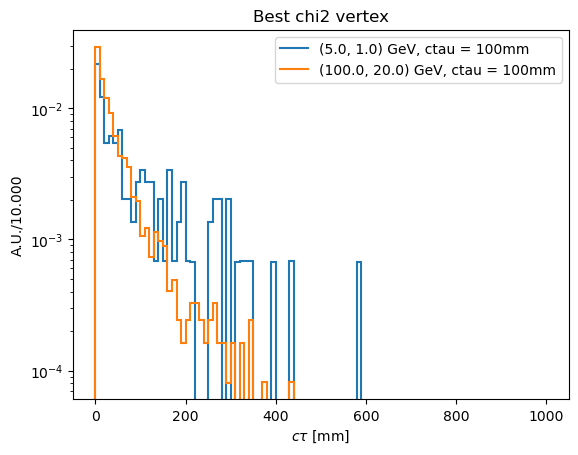

In [42]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'ctau',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 100j,
    'xlim': [0,1000],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 vertex')
plt.legend()
plt.show()

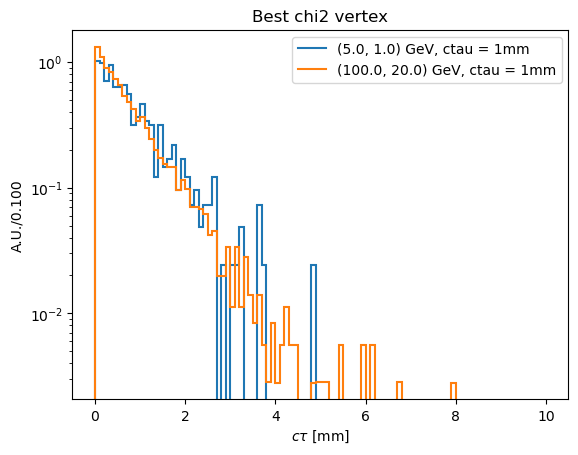

In [43]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'ctau',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,10],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 vertex')
plt.legend()
plt.show()

In [44]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'ctau',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 10j,
    'xlim': [0,100],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow

}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [10]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 vertex')
plt.legend()
plt.show()

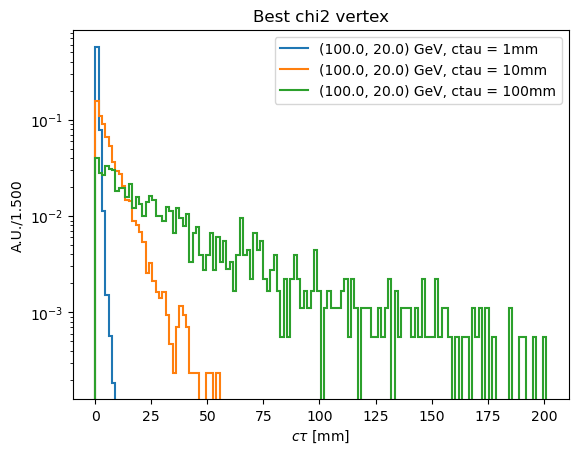

In [45]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'ctau',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 15j,
    'xlim': [0,200],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow

}

# signal points
m1s = [100]
deltas = [0.2]
ctaus = [1,10,100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 vertex')
plt.legend()
plt.show()

### cos_collinear

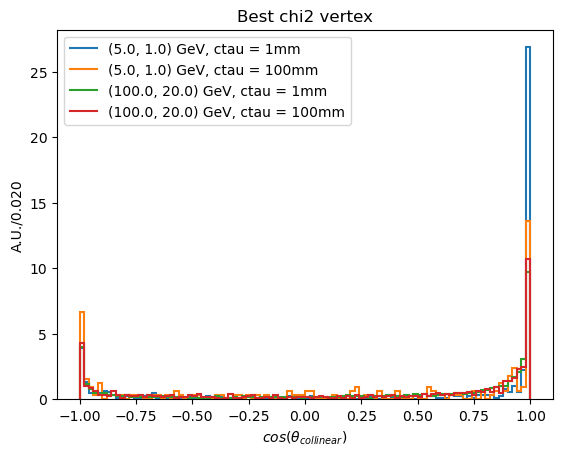

In [46]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'cos_collinear',
    'cut': 'cut5',
}

style_dict = {
    'rebin': 10j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow

}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 vertex')
plt.legend()
plt.show()

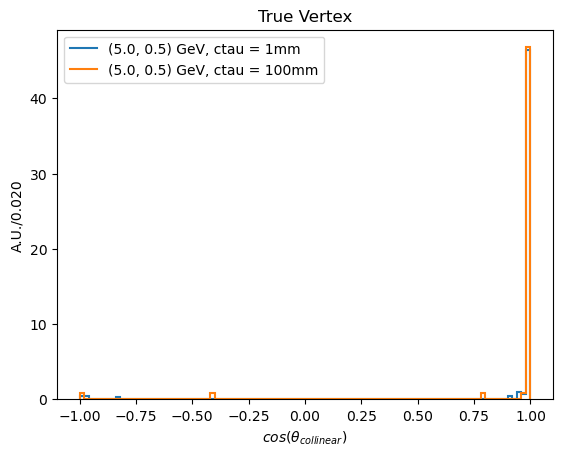

In [47]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'cos_collinear',
    'cut': 'cut5',
}

style_dict = {
    'rebin': 10j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Vertex')
plt.legend()
plt.show()

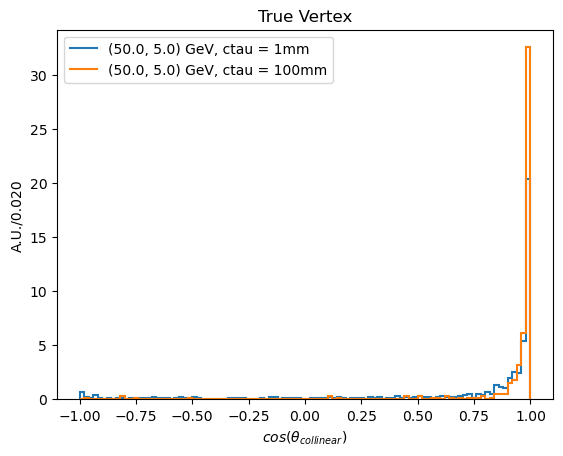

In [48]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'cos_collinear',
    'cut': 'cut5',
}

style_dict = {
    'rebin': 10j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [50]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Vertex')
plt.legend()
plt.show()

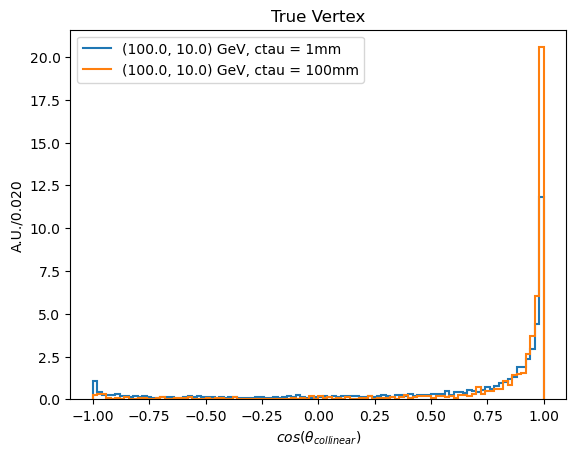

In [49]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'cos_collinear',
    'cut': 'cut5',
}

style_dict = {
    'rebin': 10j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Vertex')
plt.legend()
plt.show()

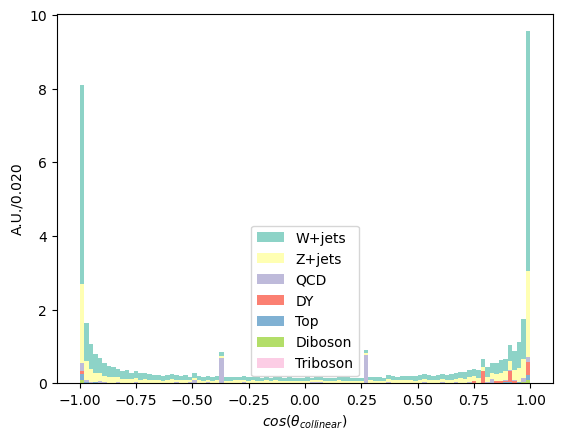

In [50]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'cos_collinear',
    'cut': 'cut5',
}

style_dict = {
    'rebin': 10j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### gen_cos_collinear

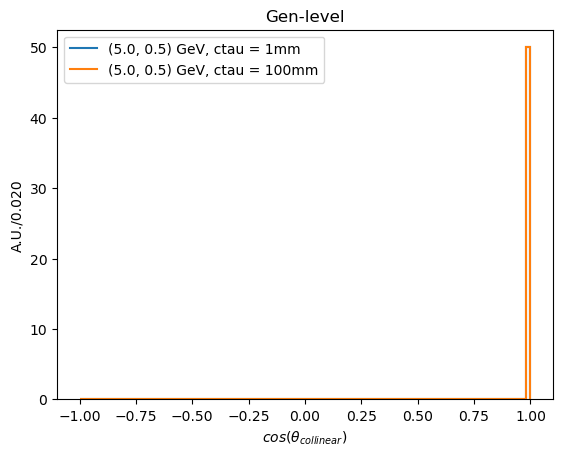

In [51]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'gen_cos_collinear',
    'cut': 'cut5',
}

style_dict = {
    'rebin': 10j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('Gen-level')
plt.legend()
plt.show()

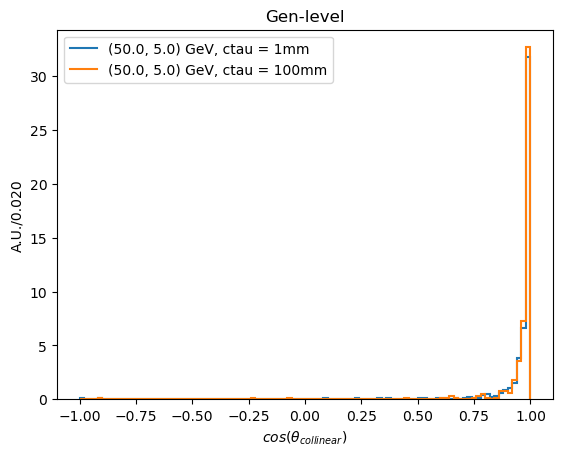

In [52]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'gen_cos_collinear',
    'cut': 'cut5',
}

style_dict = {
    'rebin': 10j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [50]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('Gen-level')
plt.legend()
plt.show()

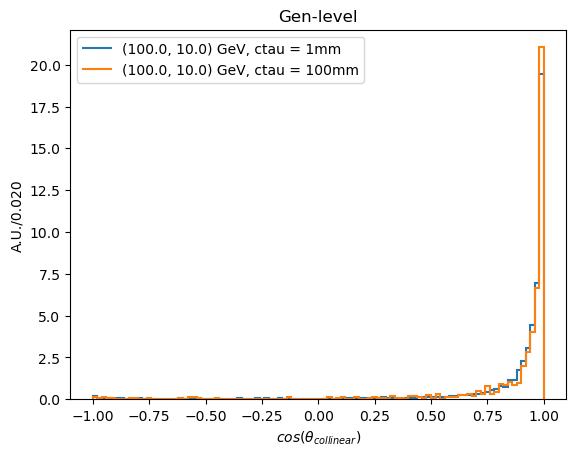

In [53]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'gen_cos_collinear',
    'cut': 'cut5',
}

style_dict = {
    'rebin': 10j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('Gen-level')
plt.legend()
plt.show()

### projectedLxy

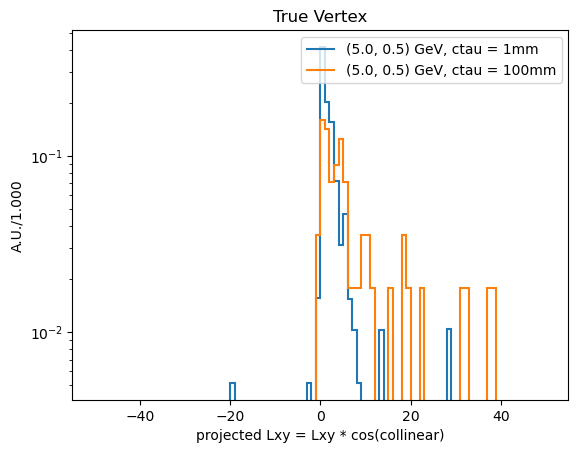

In [54]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_projected',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 40j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': 'projected Lxy = Lxy * cos(collinear)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Vertex')
plt.legend()
plt.show()

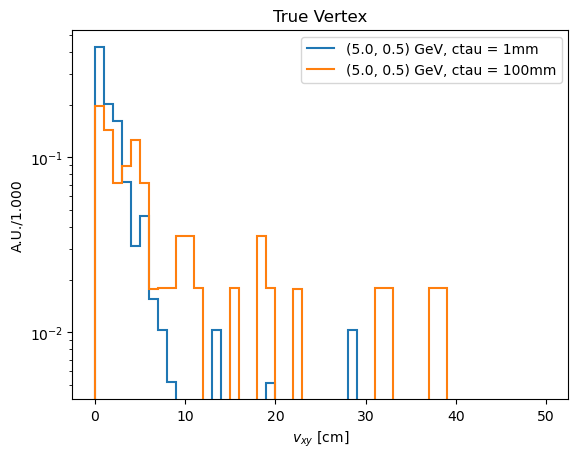

In [55]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 40j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Vertex')
plt.legend()
plt.show()

In [56]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_projected',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 40j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': 'projected Lxy = Lxy * cos(collinear)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Vertex')
plt.legend()
plt.show()

In [57]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 40j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Vertex')
plt.legend()
plt.show()

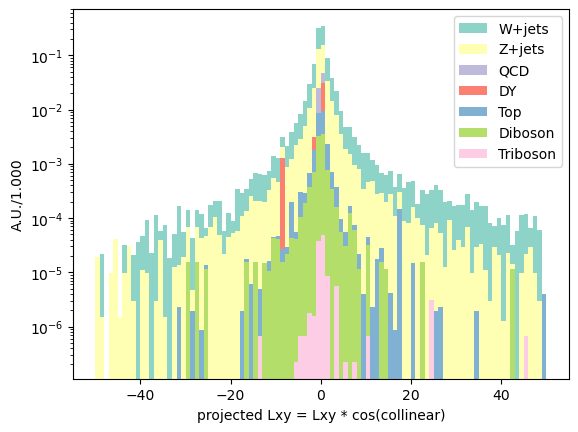

In [58]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_projected',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 40j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': 'projected Lxy = Lxy * cos(collinear)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

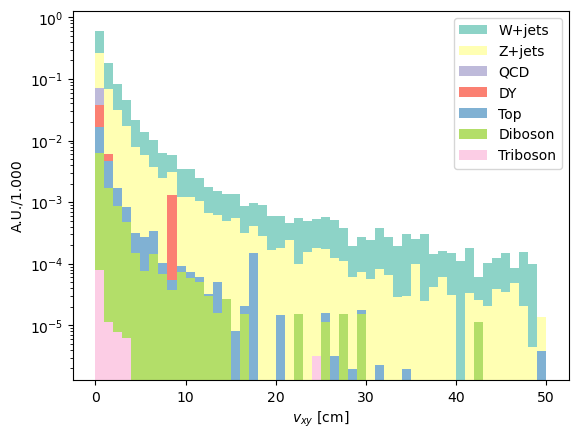

In [59]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 40j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}


# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### gen pT (chi2)

In [60]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'gen_chi2_pt',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 10j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('Gen-level chi2 pT')
plt.legend()
plt.show()

### gen pT (ee)

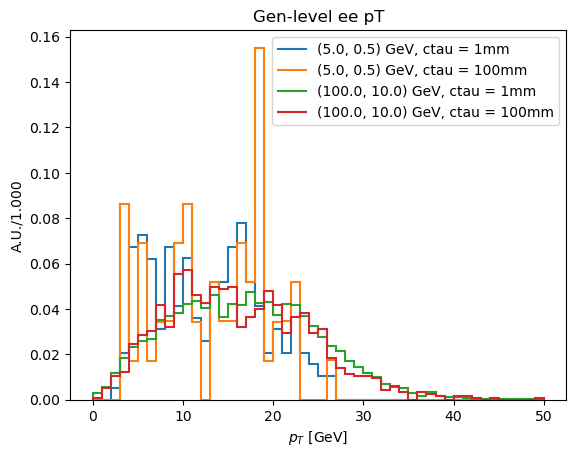

In [61]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'gen_ee_pt',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': [0,50],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('Gen-level ee pT')
plt.legend()
plt.show()

### gen_chi2_ee_pt_ratio

In [62]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'gen_chi2_ee_pt_ratio',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': 'pT(ee)/pT(chi2)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('Gen-level pT ratio')
plt.legend()
plt.show()

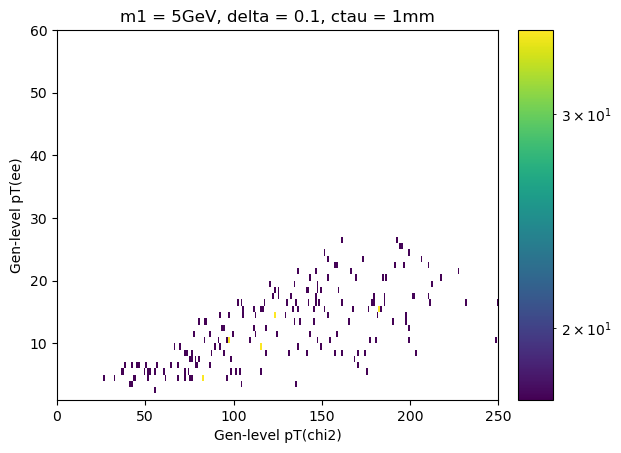

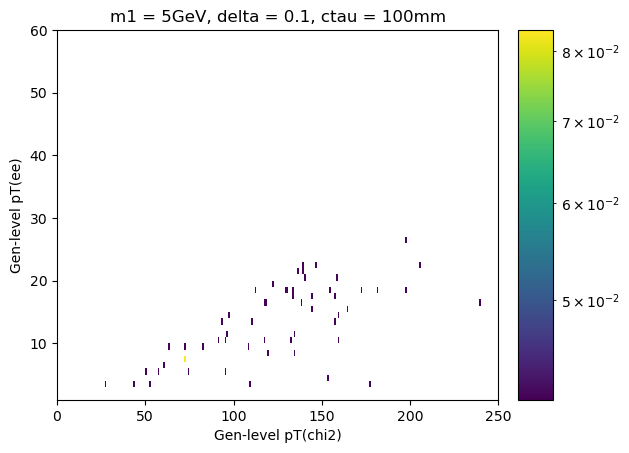

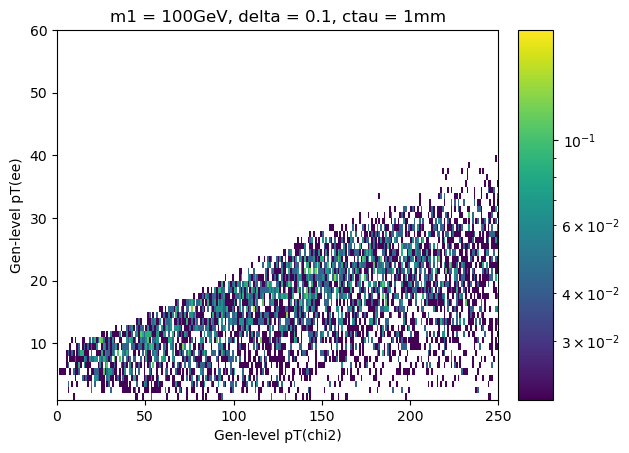

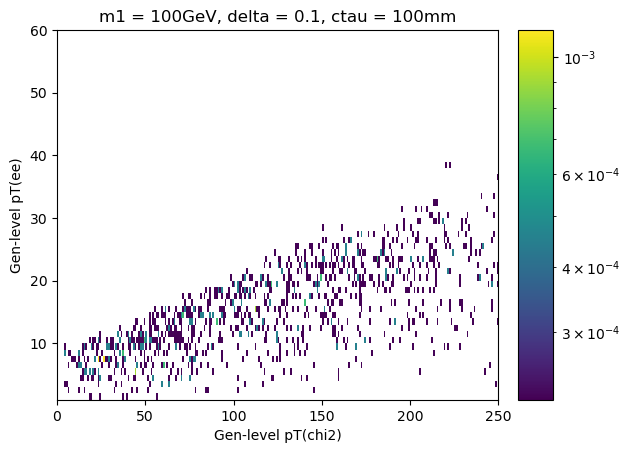

In [30]:
# Plot settings
plot_dict = {
    'variable': 'gen_chi2_pt_vs_gen_ee_pt',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0,60],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': 'Gen-level pT(chi2)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Gen-level pT(ee)',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### abs_cos_collinear

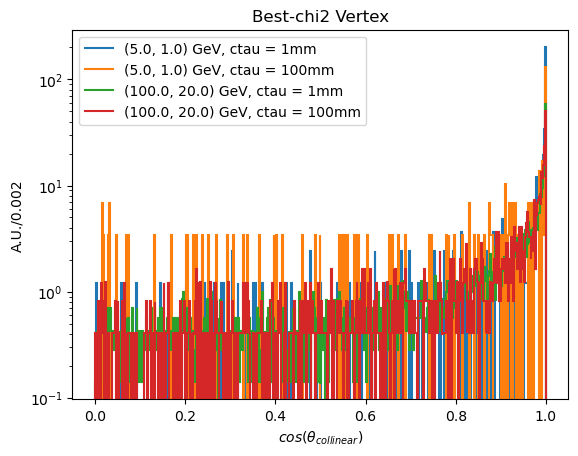

In [31]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'abs_cos_collinear',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best-chi2 Vertex')
plt.legend()
plt.show()

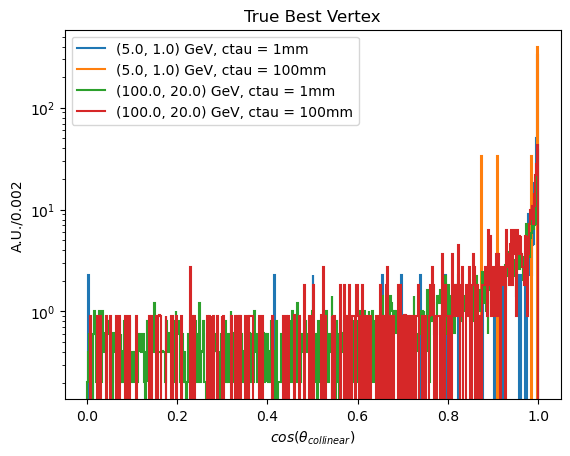

In [32]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'abs_cos_collinear',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

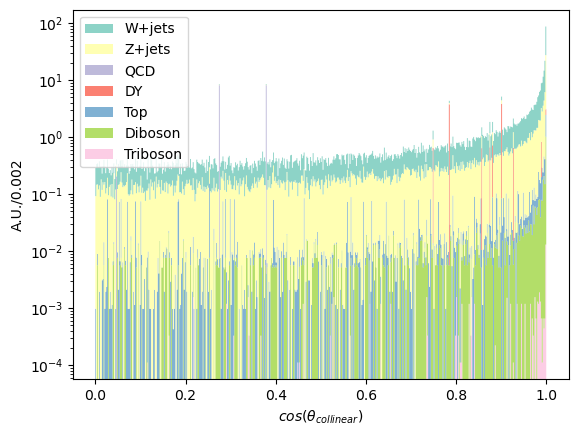

In [33]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_prod_eta

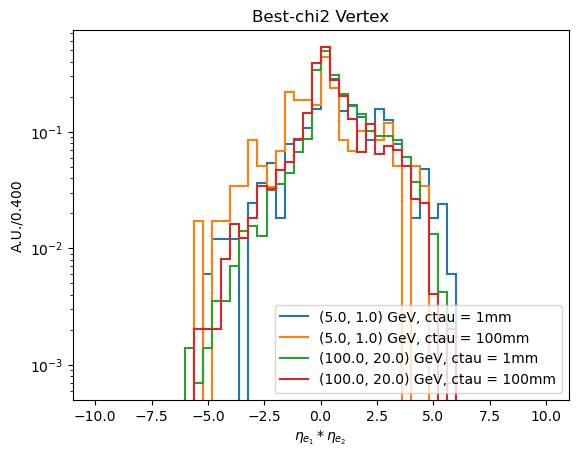

In [60]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_prod_eta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best-chi2 Vertex')
plt.legend()
plt.show()

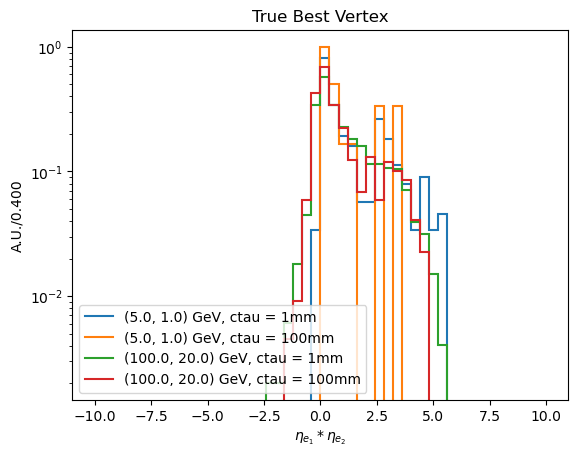

In [61]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_prod_eta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

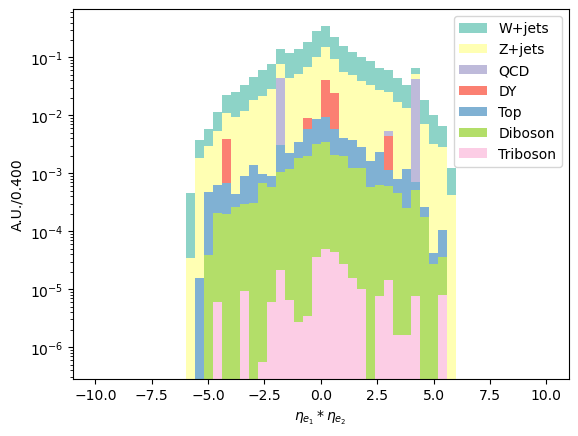

In [62]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_vxy

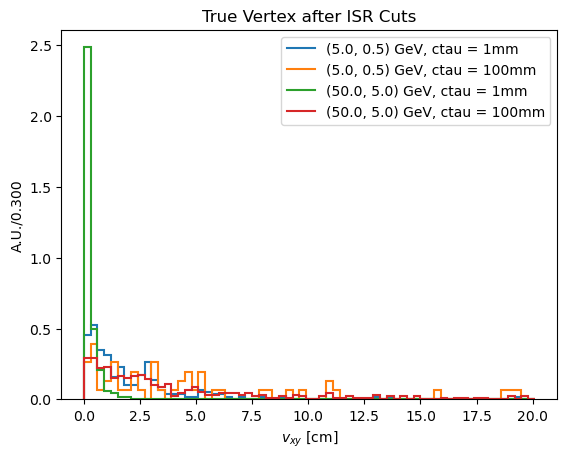

In [91]:
sig_histo_all = util.load(f'../Lxy/coffea/skimmed/SR_ISRcuts_TrueVertex.coffea')[0]

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 12j,
    'xlim': [0,20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 50]
deltas = [0.1]
ctaus = [1, 100]

fig, ax = plt.subplots()

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_all, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Vertex after ISR Cuts')
plt.legend()

In [92]:
# Background
bkg_files = {
    "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

bkg_histos_all = {}

for b in bkg_files.keys():
    bkg_histos_all[b] = util.load(f'../Lxy/coffea/skimmed/{bkg_files[b]}_SR_ISRcuts.coffea')[0]


In [94]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos_all, plot_dict, style_dict)

plt.title('After ISR Cuts')

Text(0.5, 1.0, 'After ISR Cuts')

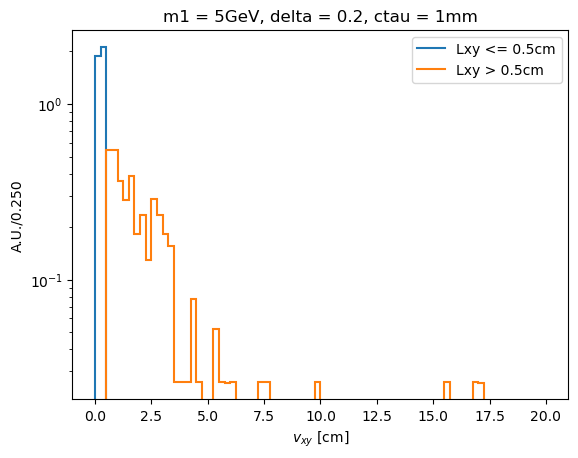

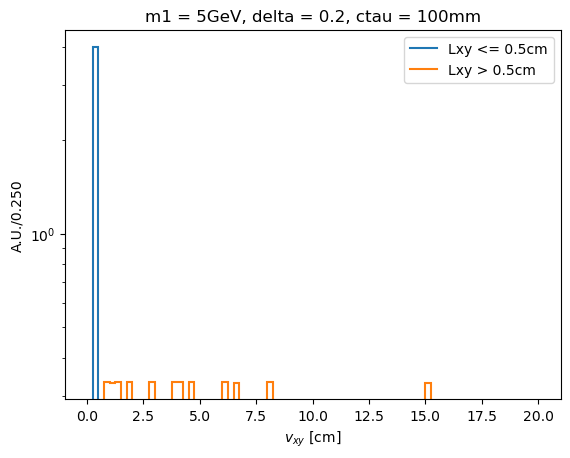

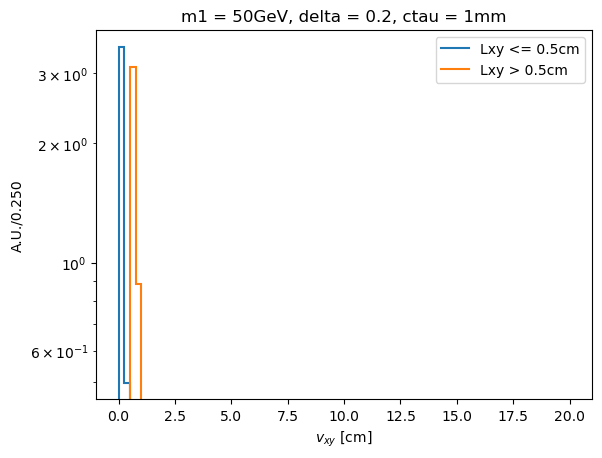

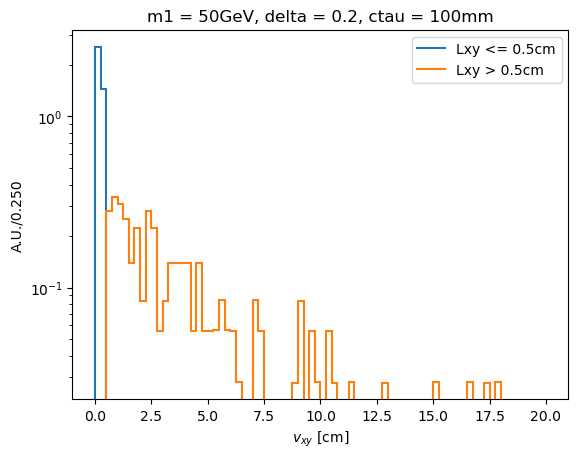

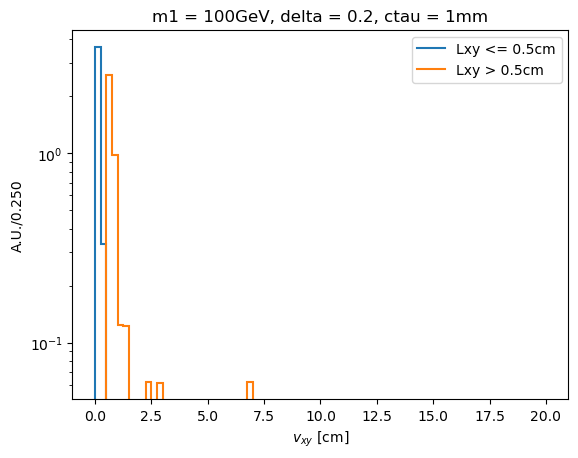

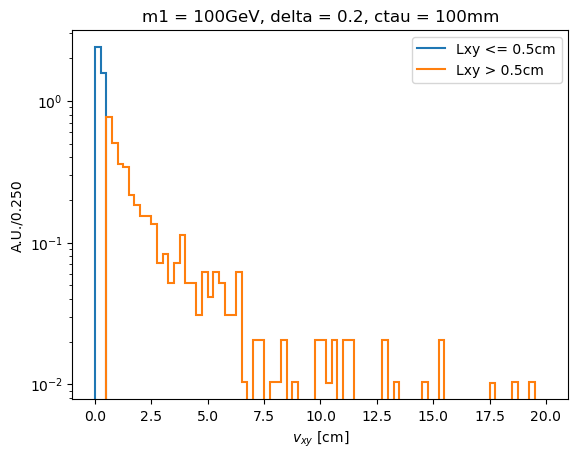

In [76]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy',
    'cut': 'LxyBin',
}

style_dict = {
    'rebin': 10j,
    'xlim': [0,20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 50, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'Lxy <= 0.5cm'
            utils.plot_signal_1D(ax, sig_histo_low, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'Lxy > 0.5cm'
            utils.plot_signal_1D(ax, sig_histo_high, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

Text(0.5, 1.0, 'All Background (Stacked)')

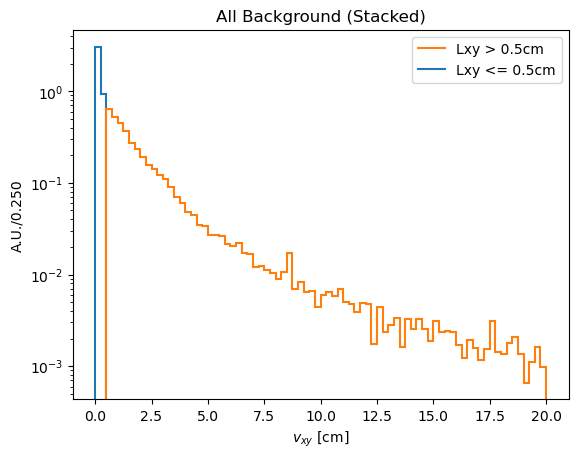

In [61]:
fig, ax = plt.subplots()

# bkg
style_dict['label'] = 'Lxy <= 0.5cm'
utils.plot_bkg_1d_stacked(ax, bkg_histos_low, plot_dict, style_dict)


style_dict['label'] = 'Lxy > 0.5cm'
utils.plot_bkg_1d_stacked(ax, bkg_histos_high, plot_dict, style_dict)

plt.title('All Background (Stacked)')

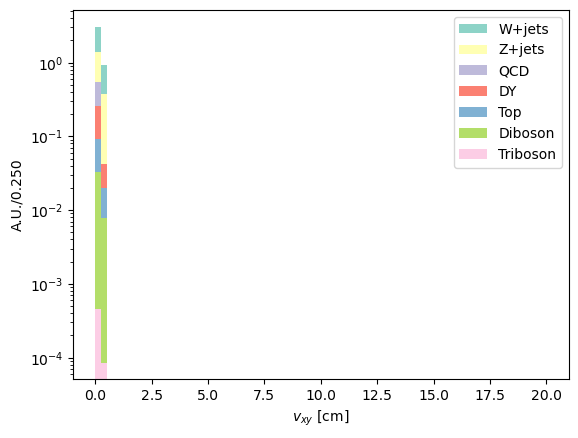

In [17]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos_low, plot_dict, style_dict)

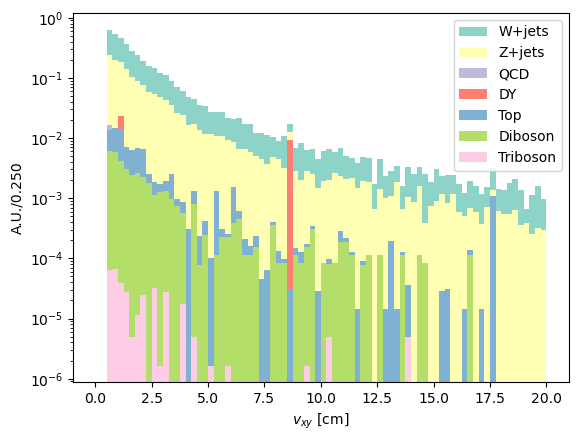

In [18]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos_high, plot_dict, style_dict)

### dxy1

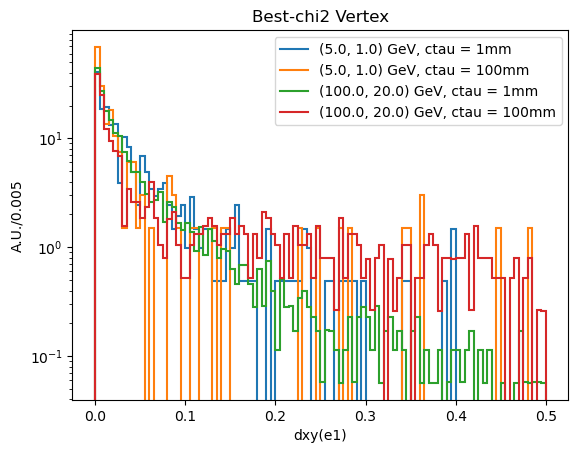

In [68]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dxy1',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': 'dxy(e1)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best-chi2 Vertex')
plt.legend()
plt.show()

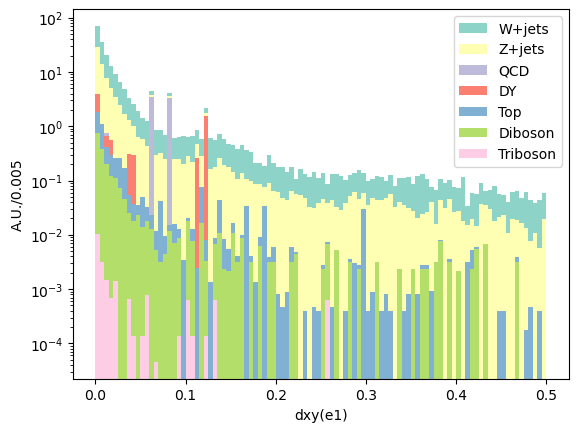

In [69]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

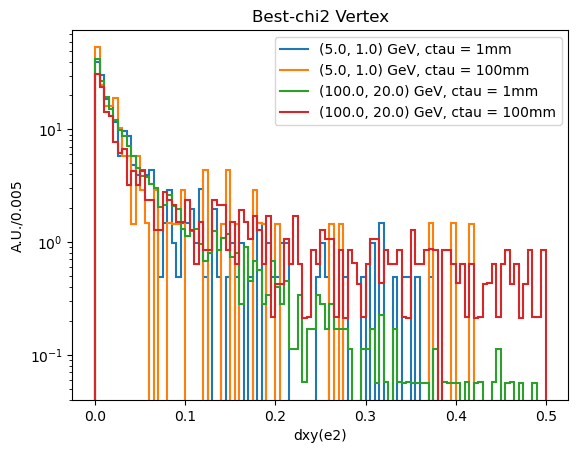

In [70]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dxy2',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': 'dxy(e2)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best-chi2 Vertex')
plt.legend()
plt.show()

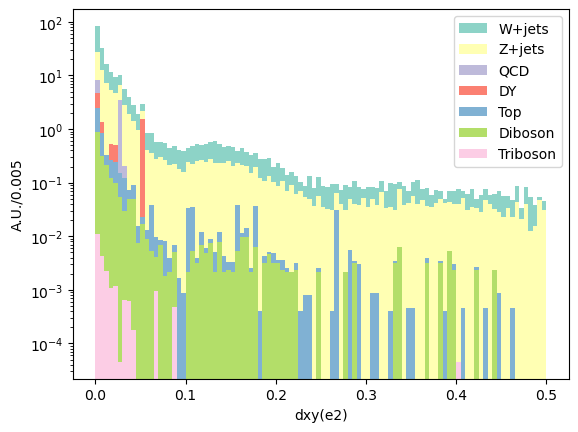

In [71]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_minDxy

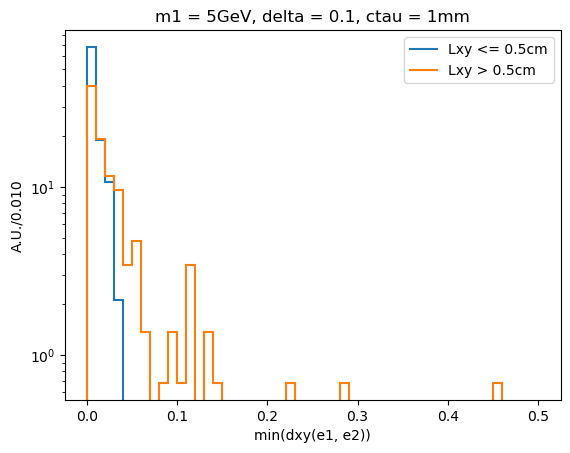

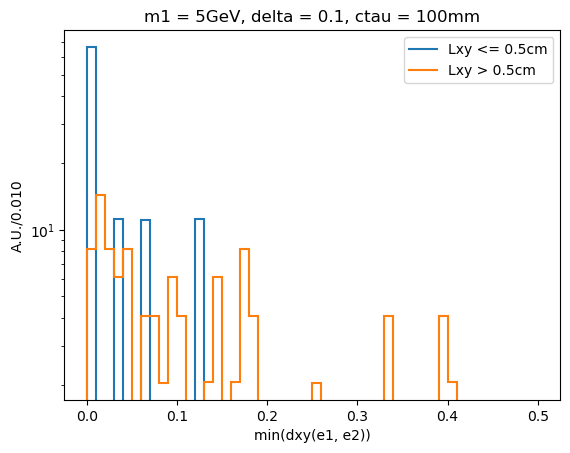

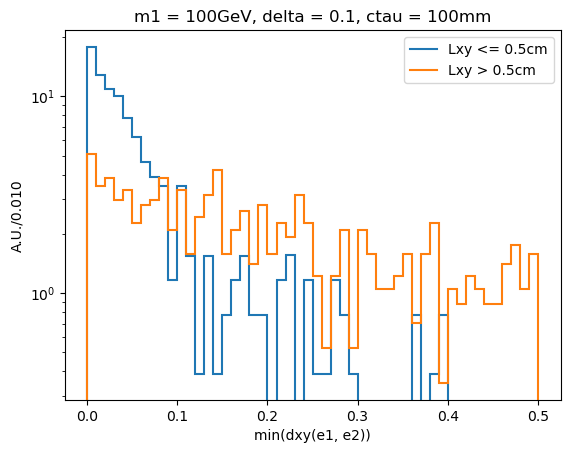

In [97]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDxy',
    'cut': 'LxyBin',
}

style_dict = {
    'rebin': 10j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': 'min(dxy(e1, e2))',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 50, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'Lxy <= 0.5cm'
            utils.plot_signal_1D(ax, sig_histo_low, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'Lxy > 0.5cm'
            utils.plot_signal_1D(ax, sig_histo_high, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

In [98]:
fig, ax = plt.subplots()

# bkg
style_dict['label'] = 'Lxy <= 0.5cm'
utils.plot_bkg_1d_stacked(ax, bkg_histos_low, plot_dict, style_dict)


style_dict['label'] = 'Lxy > 0.5cm'
utils.plot_bkg_1d_stacked(ax, bkg_histos_high, plot_dict, style_dict)

plt.title('All Background (Stacked)')

Text(0.5, 1.0, 'All Background (Stacked)')

Text(0.5, 1.0, 'Lxy <= 0.5cm')

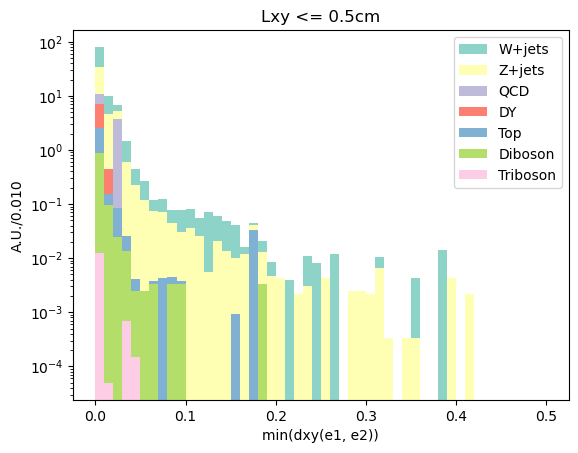

In [101]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos_low, plot_dict, style_dict)
plt.title('Lxy <= 0.5cm')

In [102]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos_high, plot_dict, style_dict)
plt.title('Lxy > 0.5cm')

Text(0.5, 1.0, 'Lxy > 0.5cm')

### sel_vtx_minDz

In [77]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDz',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


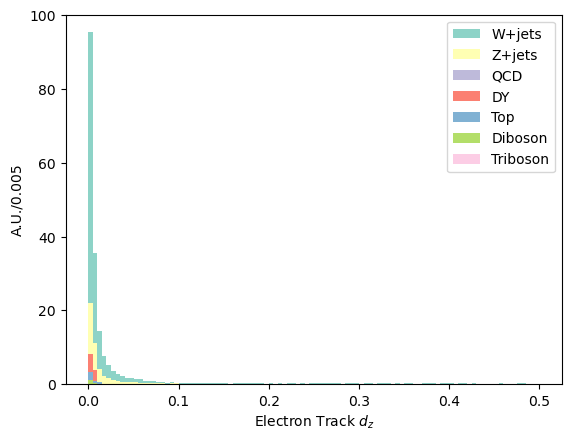

In [78]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_deltaDxy

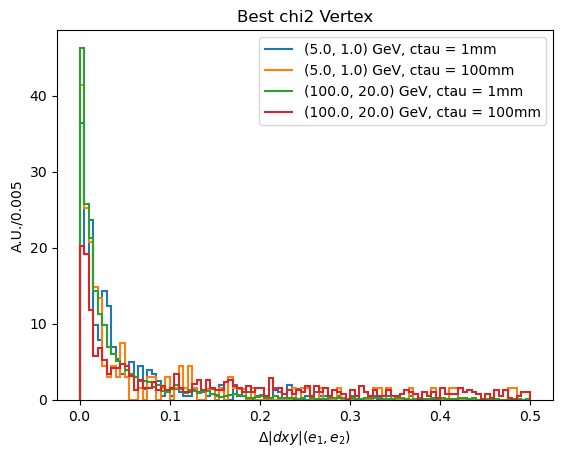

In [79]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_deltaDxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': r'$\Delta |dxy|(e_{1},e_{2})$',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [80]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_deltaDz

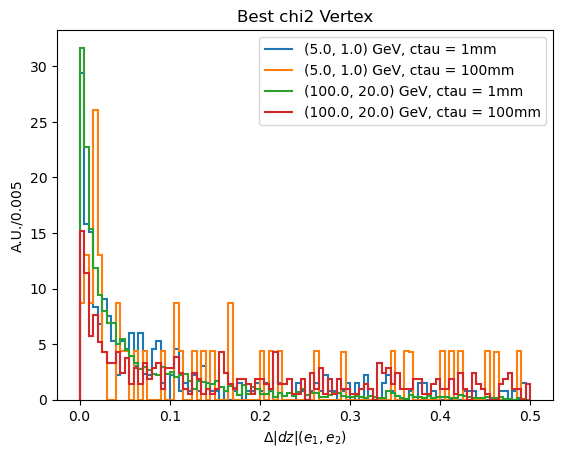

In [81]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_deltaDz',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': r'$\Delta |dz|(e_{1},e_{2})$',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


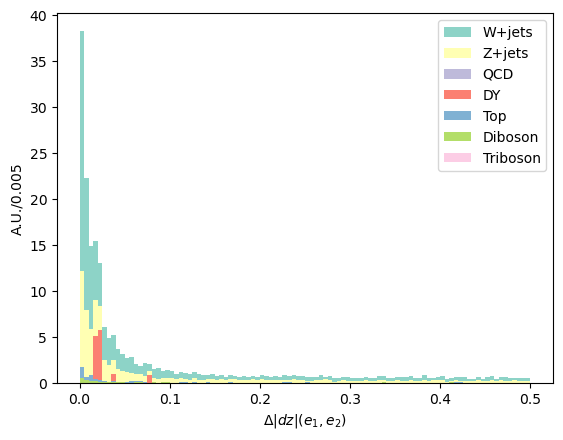

In [82]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_vxySignif

In [103]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxySignif',
    'cut': 'LxyBin',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}
# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'Lxy <= 0.5cm'
            utils.plot_signal_1D(ax, sig_histo_low, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'Lxy > 0.5cm'
            utils.plot_signal_1D(ax, sig_histo_high, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

Text(0.5, 1.0, 'All Background (Stacked)')

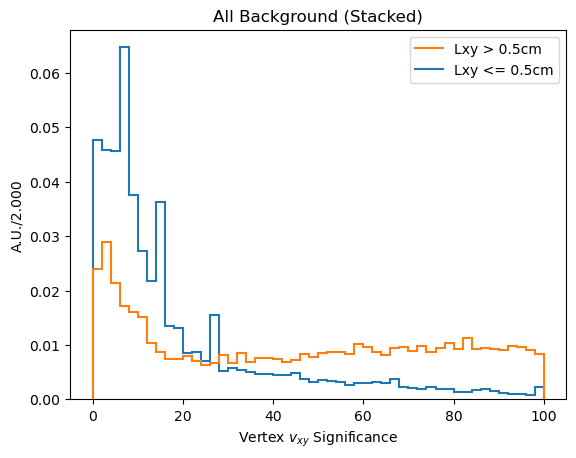

In [104]:
fig, ax = plt.subplots()

# bkg
style_dict['label'] = 'Lxy <= 0.5cm'
utils.plot_bkg_1d_stacked(ax, bkg_histos_low, plot_dict, style_dict)


style_dict['label'] = 'Lxy > 0.5cm'
utils.plot_bkg_1d_stacked(ax, bkg_histos_high, plot_dict, style_dict)

plt.title('All Background (Stacked)')

In [107]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos_low, plot_dict, style_dict)
plt.title('Lxy <= 0.5cm')

Text(0.5, 1.0, 'Lxy <= 0.5cm')

Text(0.5, 1.0, 'Lxy > 0.5cm')

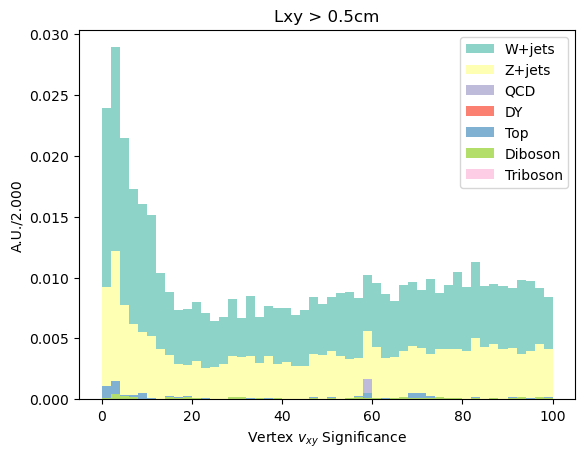

In [108]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos_high, plot_dict, style_dict)
plt.title('Lxy > 0.5cm')

### sel_vtx_type

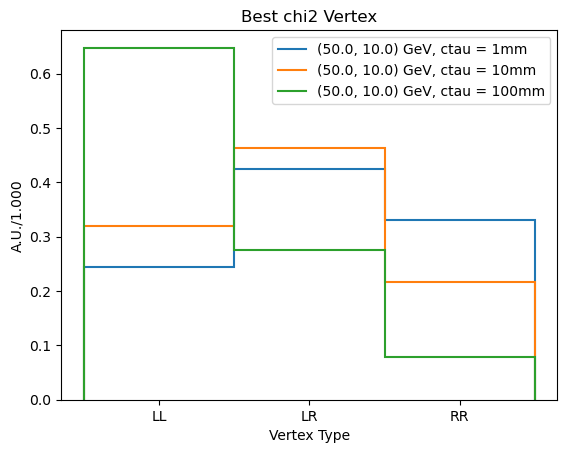

In [87]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_type',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [50]
deltas = [0.2]
ctaus = [1, 10, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [88]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_chi2

In [109]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_chi2',
    'cut': 'LxyBin',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,10],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'Lxy <= 0.5cm'
            utils.plot_signal_1D(ax, sig_histo_low, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'Lxy > 0.5cm'
            utils.plot_signal_1D(ax, sig_histo_high, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

In [110]:
fig, ax = plt.subplots()

# bkg
style_dict['label'] = 'Lxy <= 0.5cm'
utils.plot_bkg_1d_stacked(ax, bkg_histos_low, plot_dict, style_dict)


style_dict['label'] = 'Lxy > 0.5cm'
utils.plot_bkg_1d_stacked(ax, bkg_histos_high, plot_dict, style_dict)

plt.title('All Background (Stacked)')

Text(0.5, 1.0, 'All Background (Stacked)')

In [113]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos_low, plot_dict, style_dict)
plt.title('Lxy <= 0.5cm')

Text(0.5, 1.0, 'Lxy <= 0.5cm')

In [114]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos_high, plot_dict, style_dict)
plt.title('Lxy > 0.5cm')

Text(0.5, 1.0, 'Lxy > 0.5cm')

### sel_vtx_dR

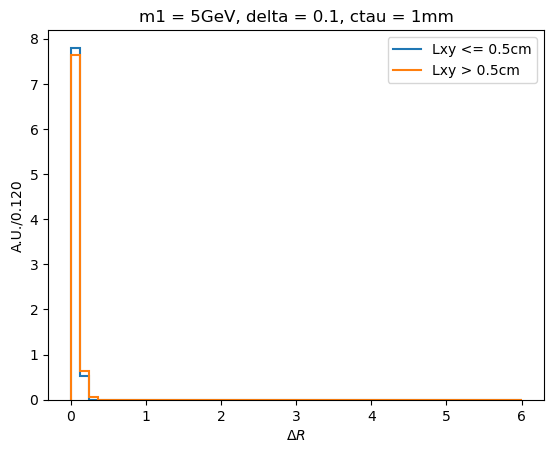

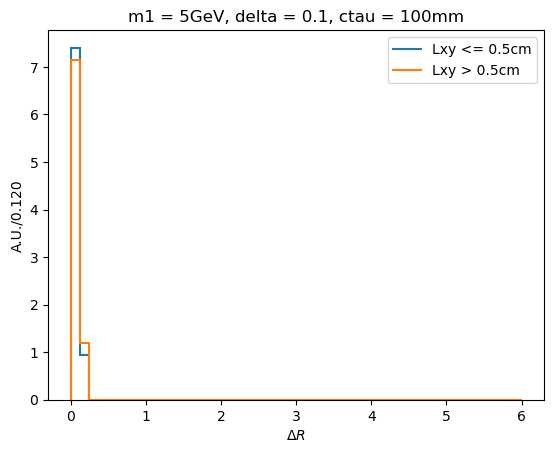

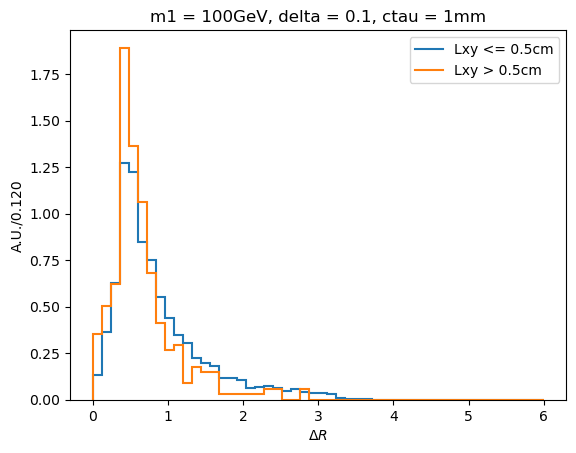

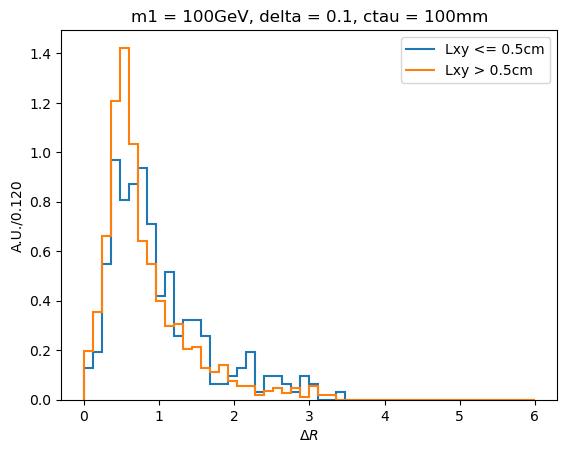

In [115]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dR',
    'cut': 'LxyBin',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}


# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'Lxy <= 0.5cm'
            utils.plot_signal_1D(ax, sig_histo_low, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'Lxy > 0.5cm'
            utils.plot_signal_1D(ax, sig_histo_high, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

Text(0.5, 1.0, 'All Background (Stacked)')

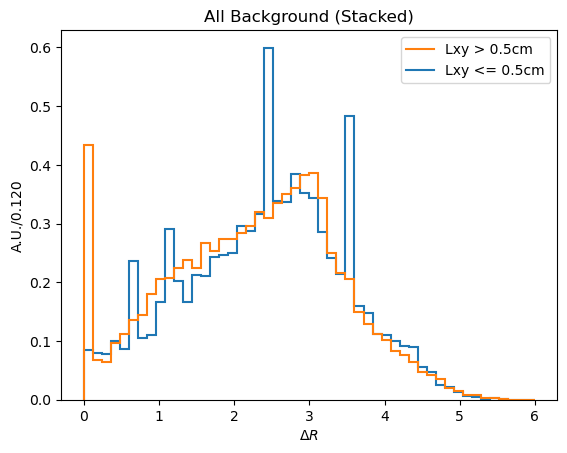

In [116]:
fig, ax = plt.subplots()

# bkg
style_dict['label'] = 'Lxy <= 0.5cm'
utils.plot_bkg_1d_stacked(ax, bkg_histos_low, plot_dict, style_dict)


style_dict['label'] = 'Lxy > 0.5cm'
utils.plot_bkg_1d_stacked(ax, bkg_histos_high, plot_dict, style_dict)

plt.title('All Background (Stacked)')

In [118]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos_low, plot_dict, style_dict)
plt.title('Lxy <= 0.5cm')

Text(0.5, 1.0, 'Lxy <= 0.5cm')

Text(0.5, 1.0, 'Lxy > 0.5cm')

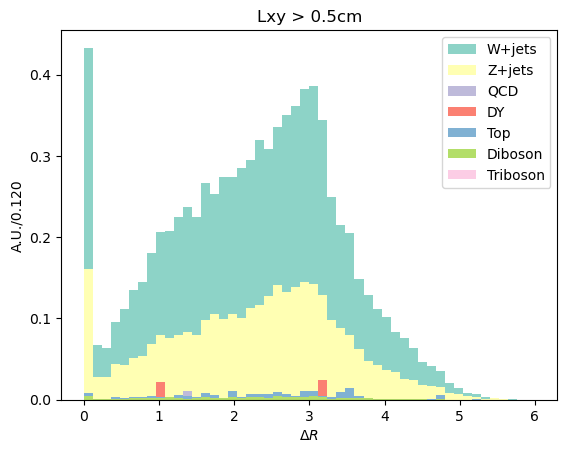

In [119]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos_high, plot_dict, style_dict)
plt.title('Lxy > 0.5cm')

### sel_vtx_dEta

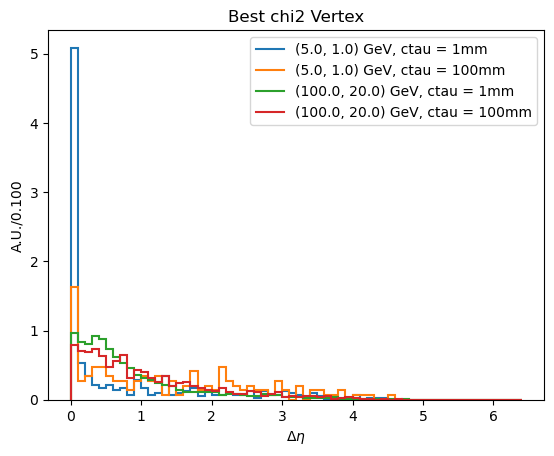

In [95]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dEta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

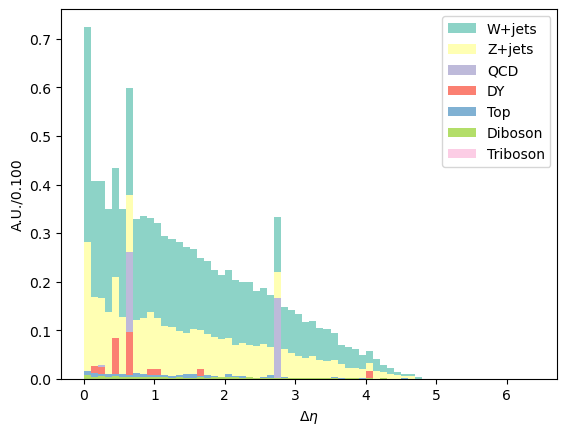

In [96]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_dPhi

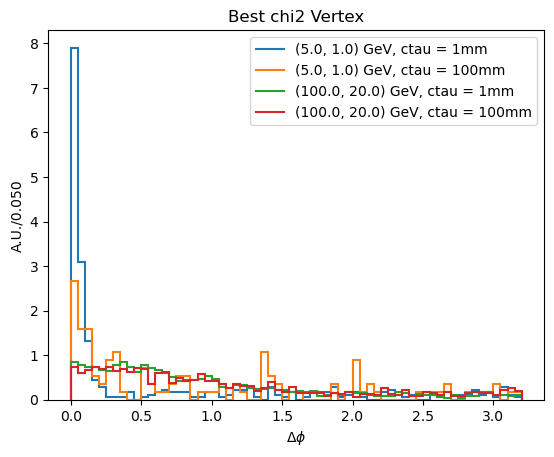

In [97]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dPhi',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

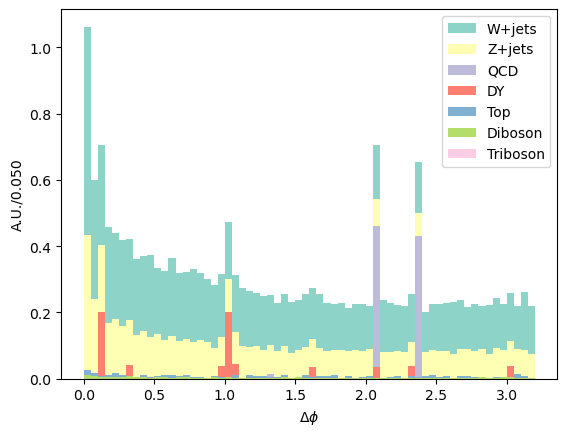

In [98]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_sign_eta

In [99]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_sign_eta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

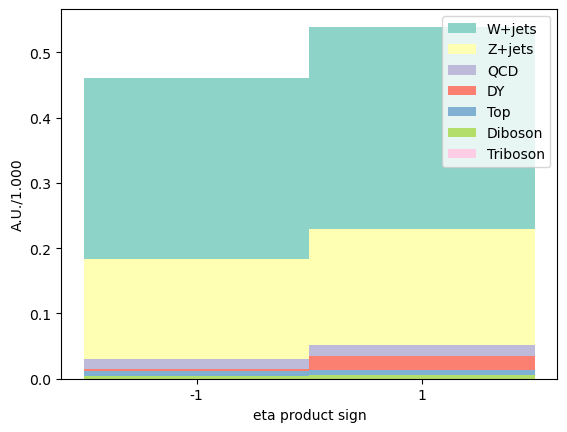

In [100]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_METdPhi

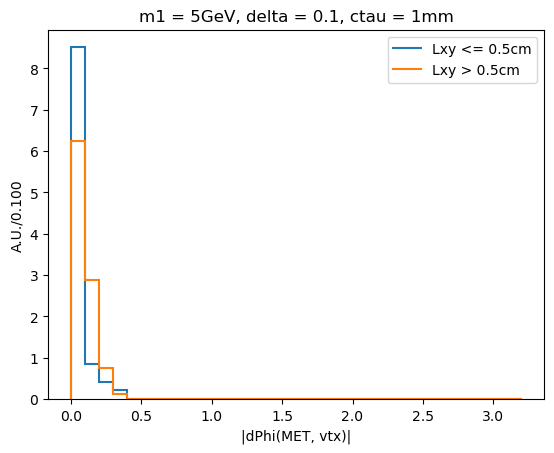

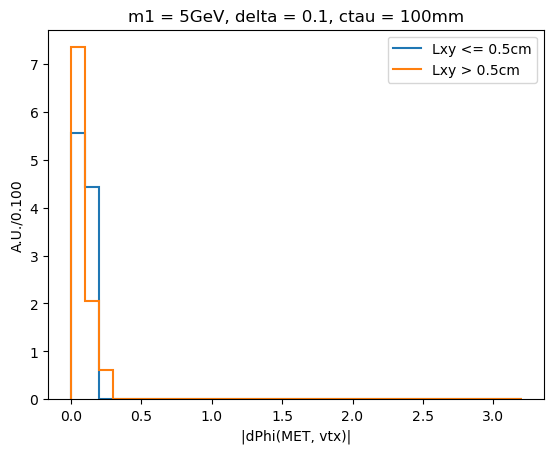

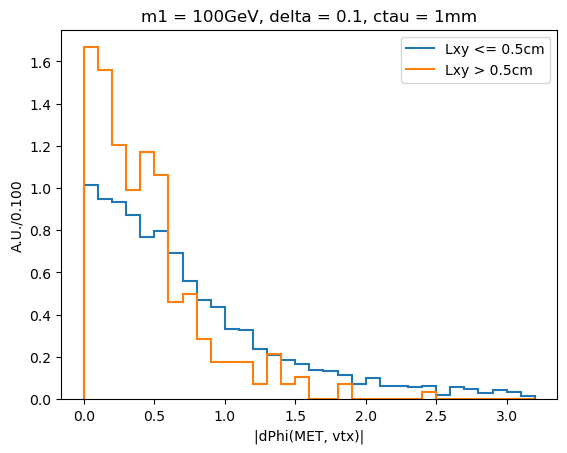

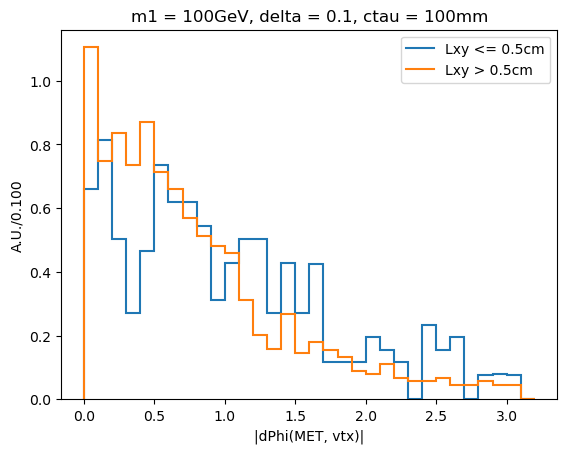

In [121]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_METdPhi',
    'cut': 'LxyBin',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': '|dPhi(MET, vtx)|',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'Lxy <= 0.5cm'
            utils.plot_signal_1D(ax, sig_histo_low, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'Lxy > 0.5cm'
            utils.plot_signal_1D(ax, sig_histo_high, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

Text(0.5, 1.0, 'All Background (Stacked)')

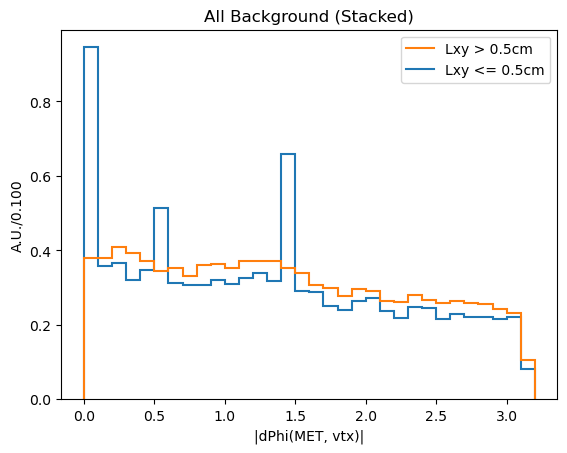

In [122]:
fig, ax = plt.subplots()

# bkg
style_dict['label'] = 'Lxy <= 0.5cm'
utils.plot_bkg_1d_stacked(ax, bkg_histos_low, plot_dict, style_dict)


style_dict['label'] = 'Lxy > 0.5cm'
utils.plot_bkg_1d_stacked(ax, bkg_histos_high, plot_dict, style_dict)

plt.title('All Background (Stacked)')

Text(0.5, 1.0, 'Lxy <= 0.5cm')

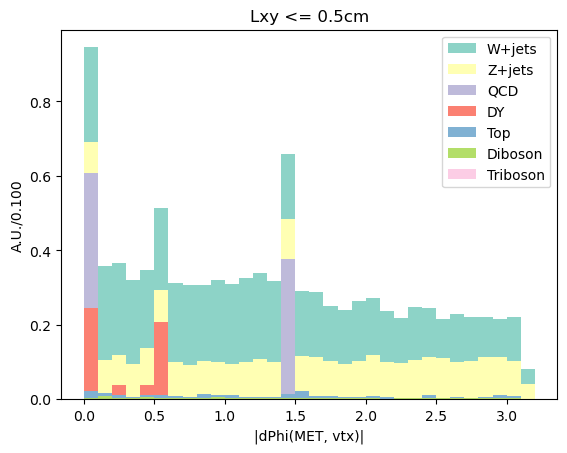

In [123]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos_low, plot_dict, style_dict)
plt.title('Lxy <= 0.5cm')

Text(0.5, 1.0, 'Lxy > 0.5cm')

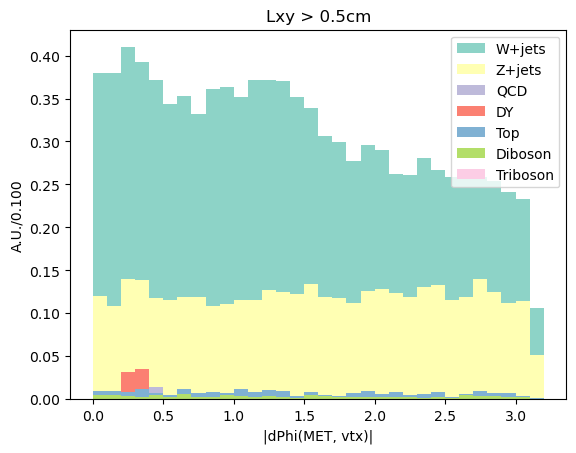

In [124]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos_high, plot_dict, style_dict)
plt.title('Lxy > 0.5cm')

### sel_vtx_pt

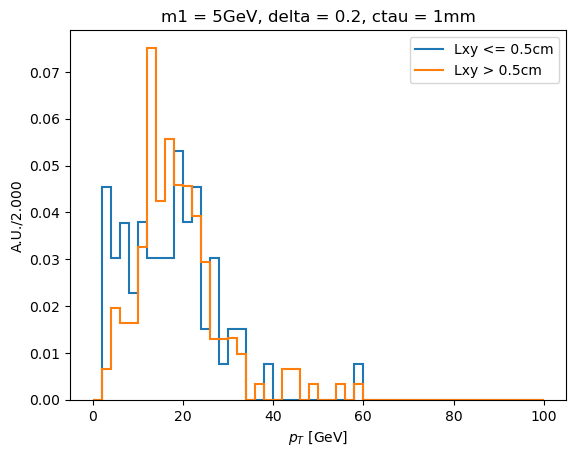

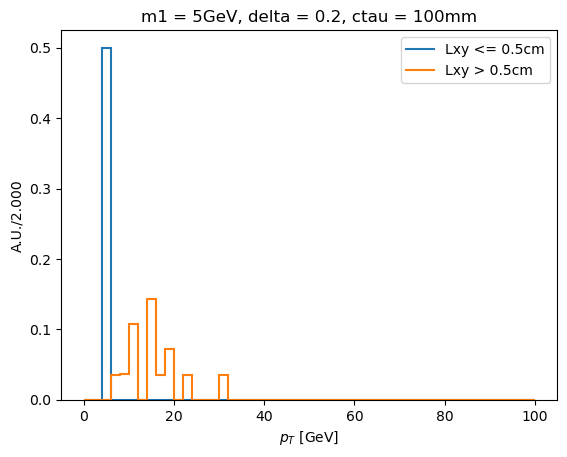

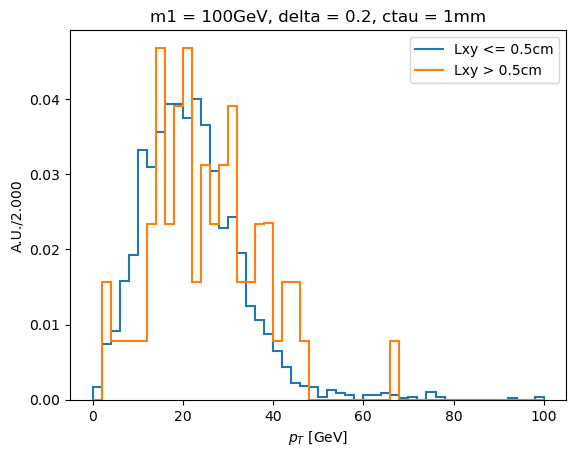

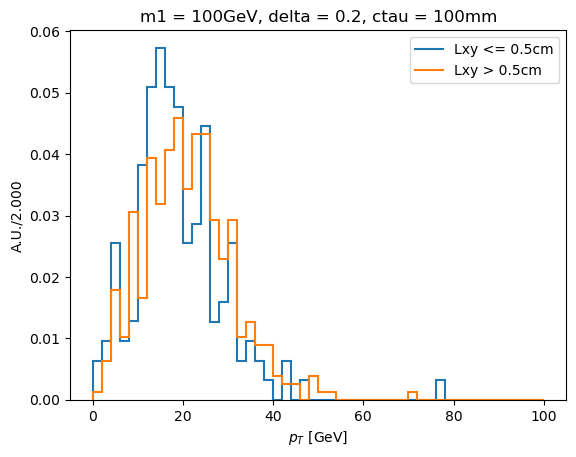

In [47]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_pt',
    'cut': 'LxyBin',
}

style_dict = {
    'rebin': 4j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'Lxy <= 0.5cm'
            utils.plot_signal_1D(ax, sig_histo_low, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'Lxy > 0.5cm'
            utils.plot_signal_1D(ax, sig_histo_high, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

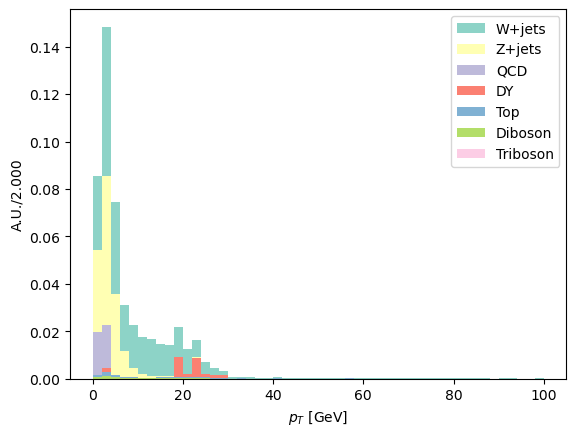

In [49]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos_low, plot_dict, style_dict)

In [50]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos_high, plot_dict, style_dict)

### sel_vtx_eta

In [105]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_eta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

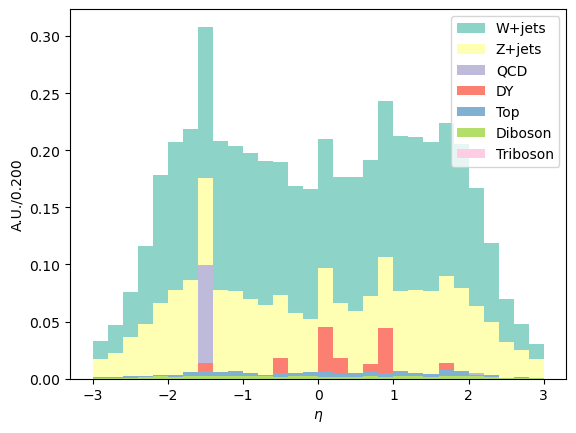

In [106]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_phi

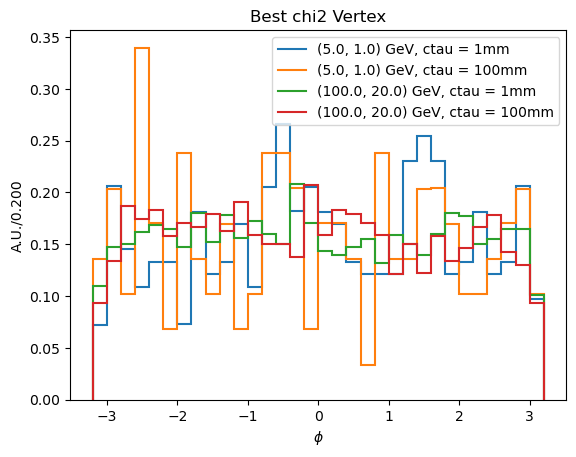

In [107]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_phi',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

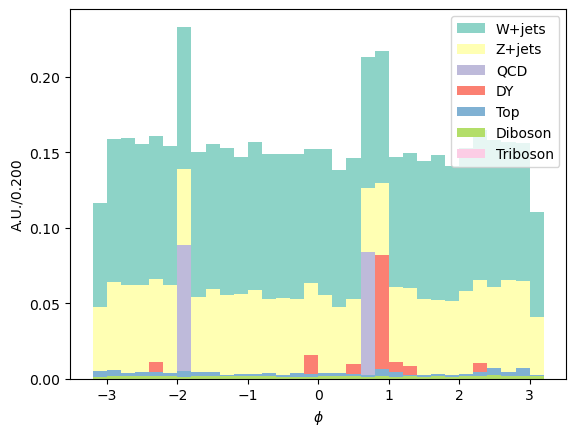

In [108]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_mass

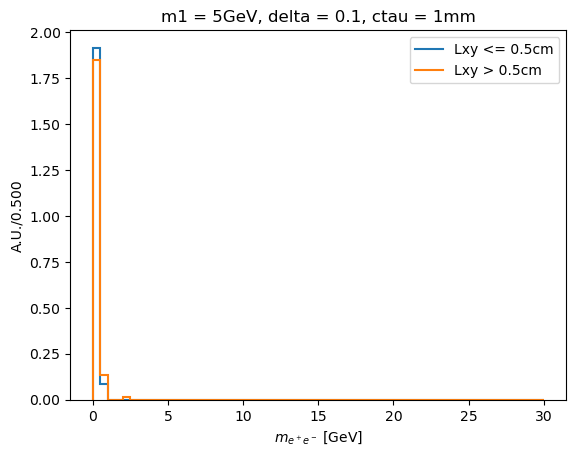

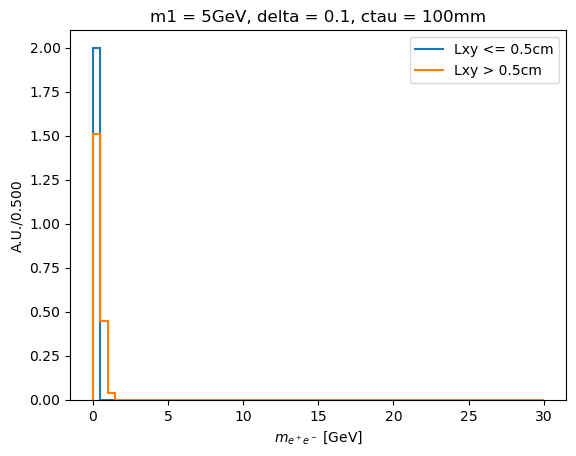

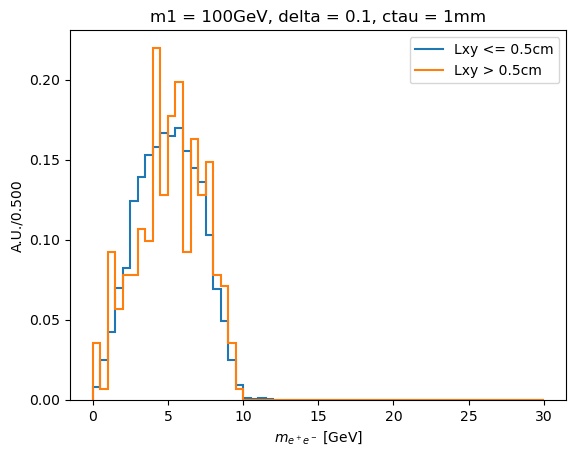

In [133]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'LxyBin',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,30],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            # plot true vertex
            style_dict['label'] = 'Lxy <= 0.5cm'
            utils.plot_signal_1D(ax, sig_histo_low, m1, delta, ctau, plot_dict, style_dict)

            # plot false vertex
            style_dict['label'] = 'Lxy > 0.5cm'
            utils.plot_signal_1D(ax, sig_histo_high, m1, delta, ctau, plot_dict, style_dict)

            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.legend()
            plt.show()

Text(0.5, 1.0, 'All Background (Stacked)')

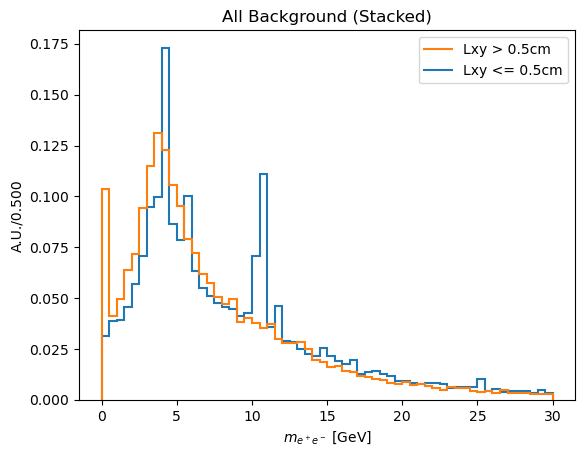

In [134]:
fig, ax = plt.subplots()

# bkg
style_dict['label'] = 'Lxy <= 0.5cm'
utils.plot_bkg_1d_stacked(ax, bkg_histos_low, plot_dict, style_dict)


style_dict['label'] = 'Lxy > 0.5cm'
utils.plot_bkg_1d_stacked(ax, bkg_histos_high, plot_dict, style_dict)

plt.title('All Background (Stacked)')

In [137]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos_low, plot_dict, style_dict)
plt.title('Lxy <= 0.5cm')

Text(0.5, 1.0, 'Lxy <= 0.5cm')

Text(0.5, 1.0, 'Lxy > 0.5cm')

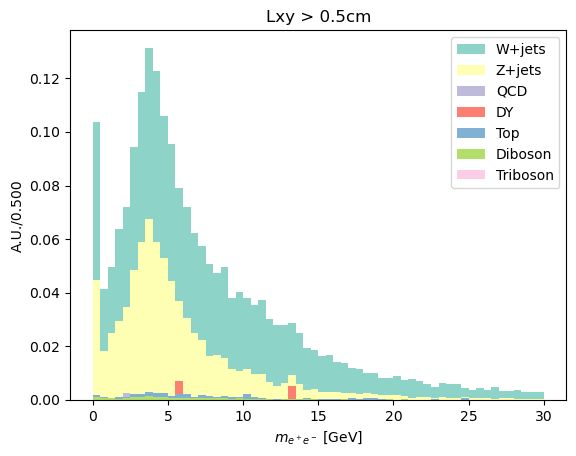

In [138]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos_high, plot_dict, style_dict)
plt.title('Lxy > 0.5cm')

### nLpt_Electron

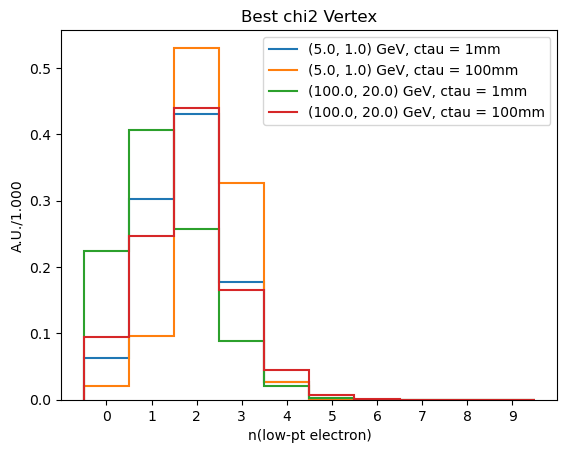

In [114]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nLpt_Electron',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': 'n(low-pt electron)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

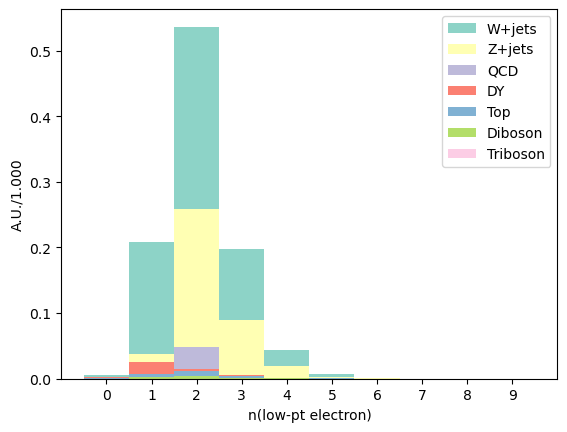

In [115]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### nPF_Electron

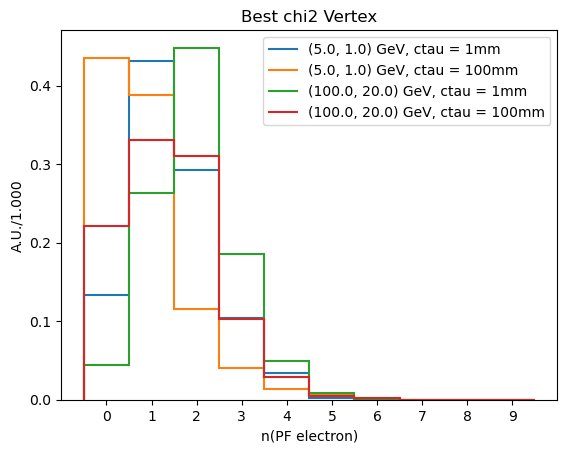

In [116]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nPF_Electron',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': 'n(PF electron)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

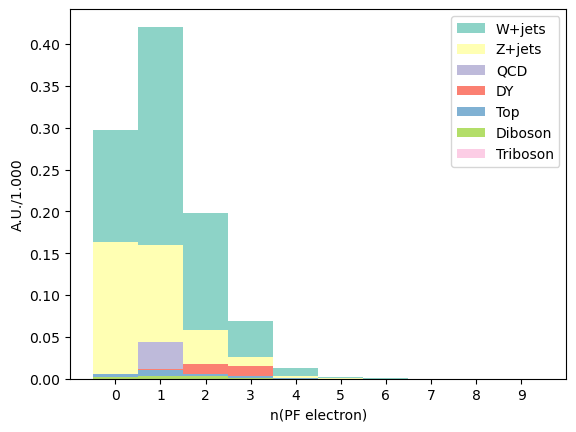

In [117]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### nElectron

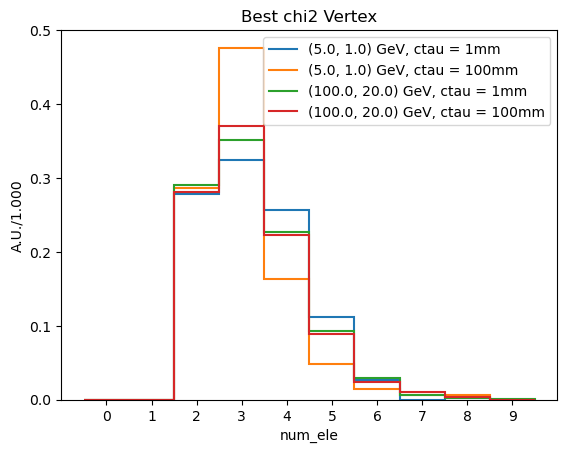

In [118]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nElectron',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

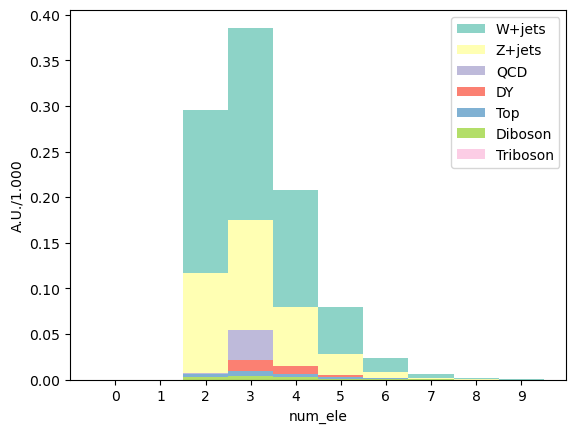

In [119]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### nGoodVtx

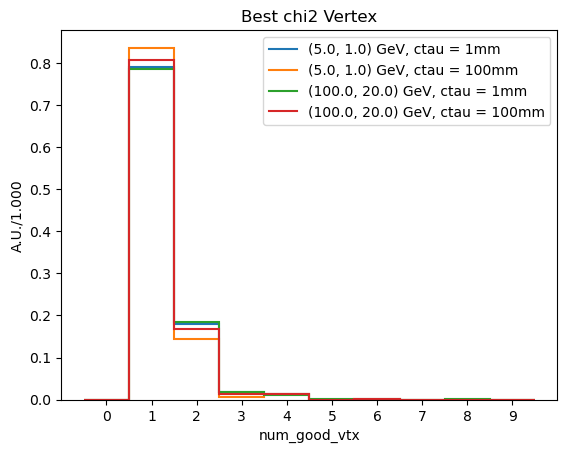

In [120]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nGoodVtx',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

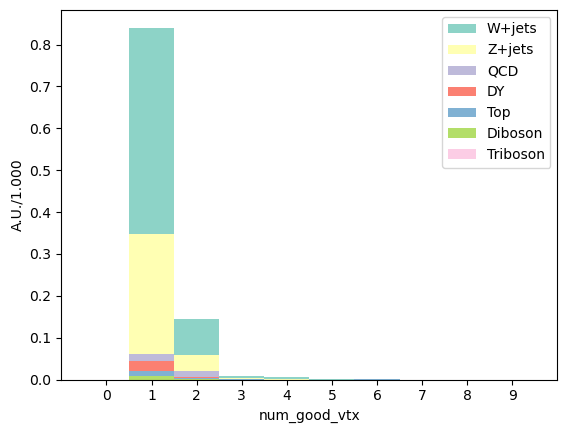

In [121]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

# Plot 2D

In [139]:
# Background
bkg_files = {
    "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

bkg_histos = {}

for b in bkg_files.keys():
    bkg_histos[b] = util.load(f'../Purities_SRefficiencies/coffea/skimmed/{bkg_files[b]}_SR_ISRcuts_BestVertex.coffea')[0]


In [140]:
sig_histo = util.load(f'../Purities_SRefficiencies/coffea/skimmed/SR_ISRcuts_TrueVertex_fewMass.coffea')[0]

Text(0.5, 1.0, 'All Background')

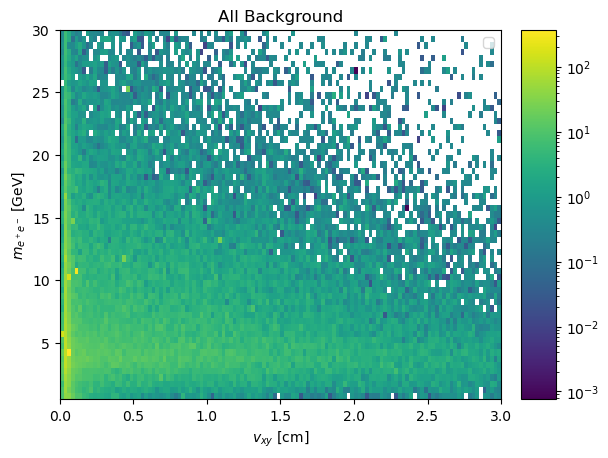

In [155]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_mass',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': [0,3],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0,30],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

fig, ax = plt.subplots()

utils.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict)

plt.title('All Background')
#utils.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, processes = ['Z+jets', 'W+jets', 'DY'])


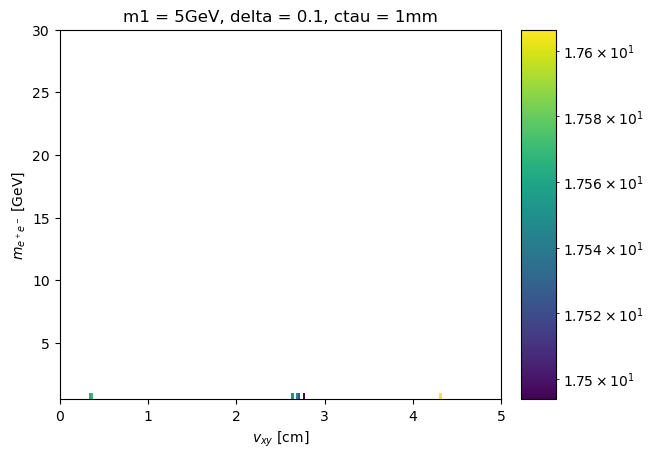

ValueError: Invalid vmin or vmax

Error in callback <function _draw_all_if_interactive at 0x7f38202585e0> (for post_execute):


ValueError: Invalid vmin or vmax

ValueError: Invalid vmin or vmax

<Figure size 640x480 with 2 Axes>

In [151]:

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

In [124]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_mass',
    'cut': 'cut9',
}

style_dict = {
    'xrebin': 2j,
    'yrebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}


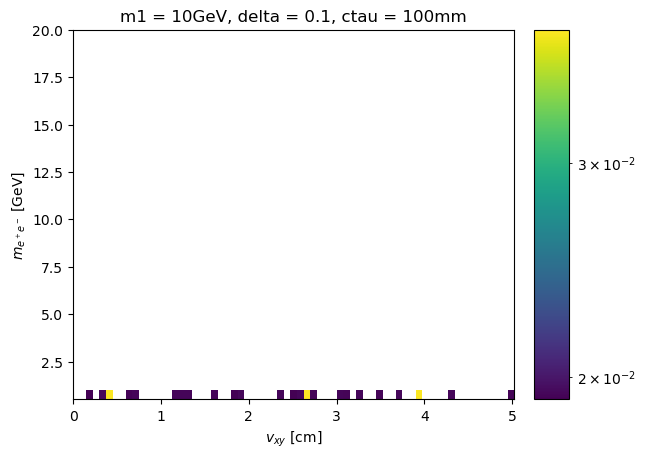

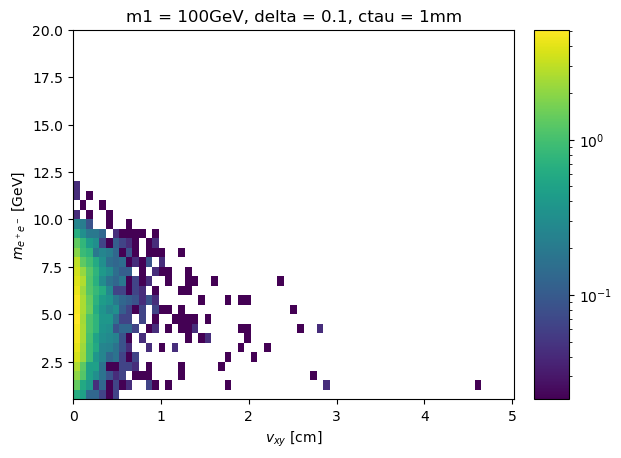

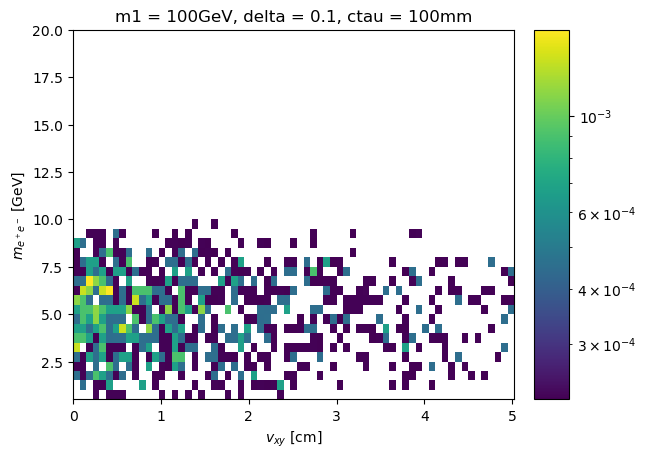

In [180]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_mass',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 3j,
    'yrebin': 1j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}


m1s = [10, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### dxy1_vs_dxy2

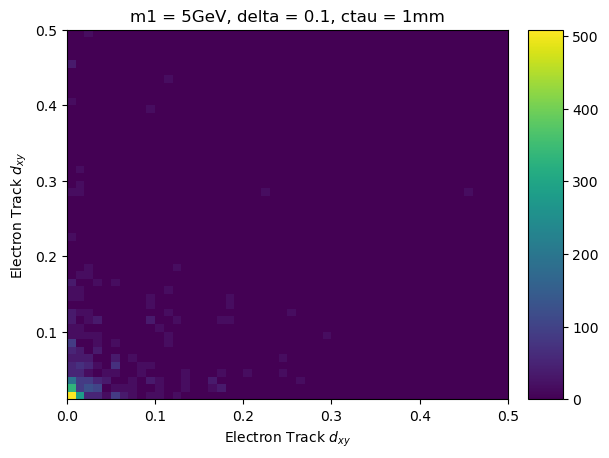

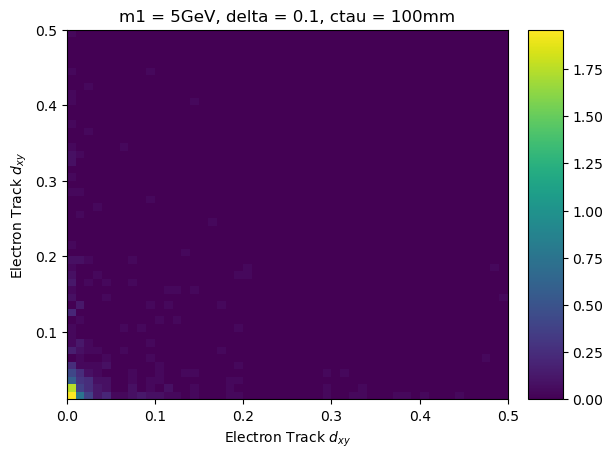

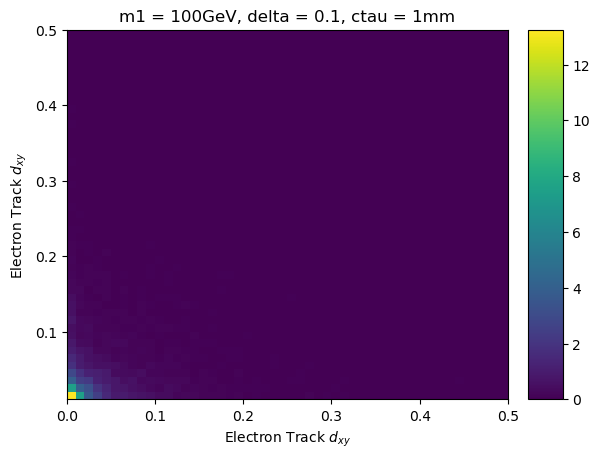

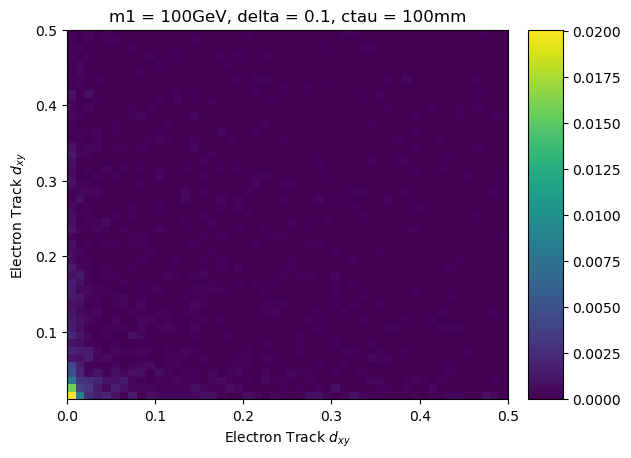

In [126]:
# Plot settings
plot_dict = {
    'variable': 'dxy1_vs_dxy2',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': [0, 0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}


m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_mindxy

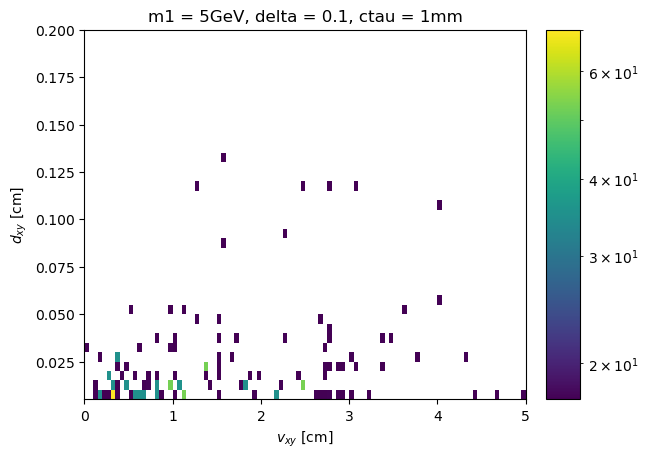

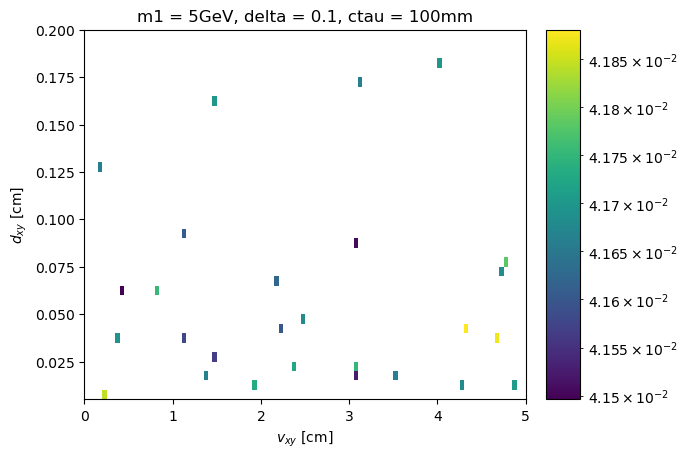

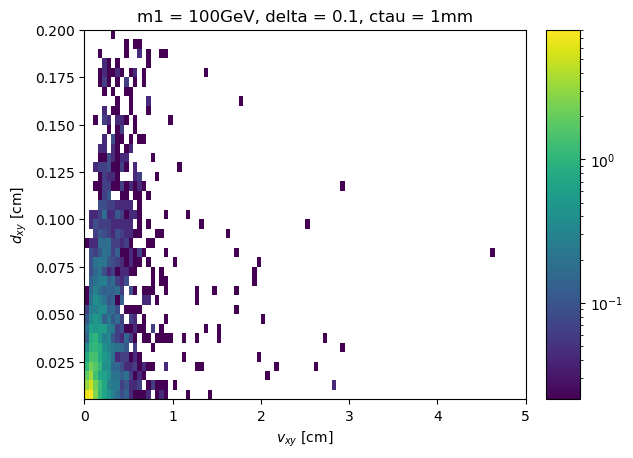

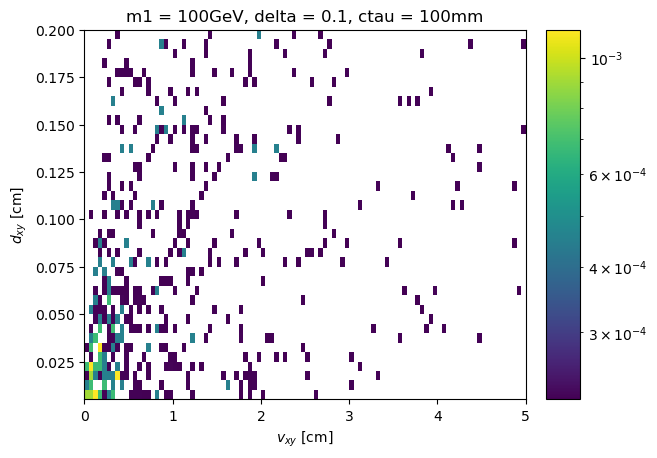

In [167]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_mindxy',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 1j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

Text(0.5, 1.0, 'All Background')

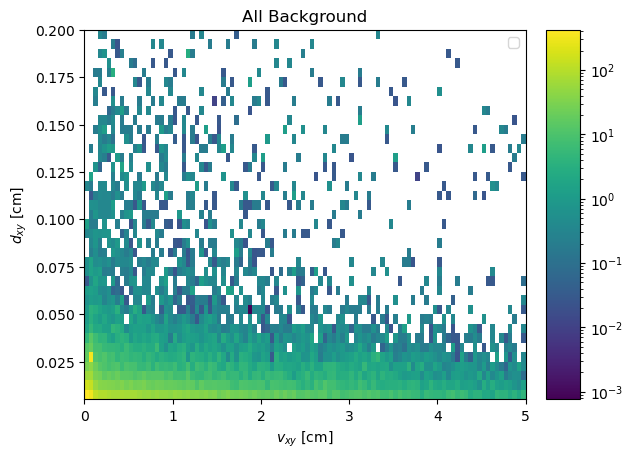

In [166]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_mindxy',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 1j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

fig, ax = plt.subplots()

utils.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict)

plt.title('All Background')
#utils.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, processes = ['Z+jets', 'W+jets', 'DY'])


### sel_vtx_vxy_vs_sel_vtx_chi2

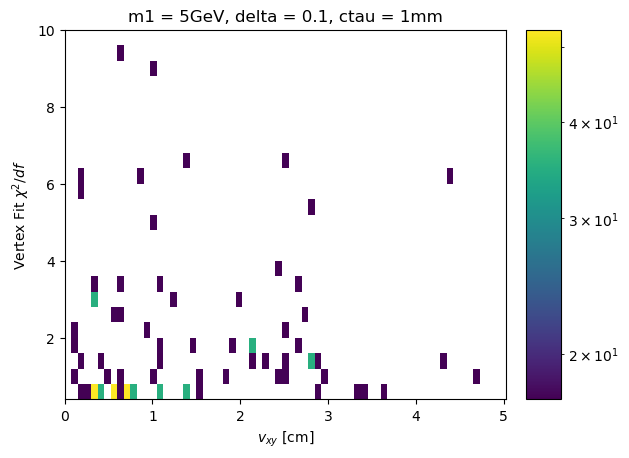

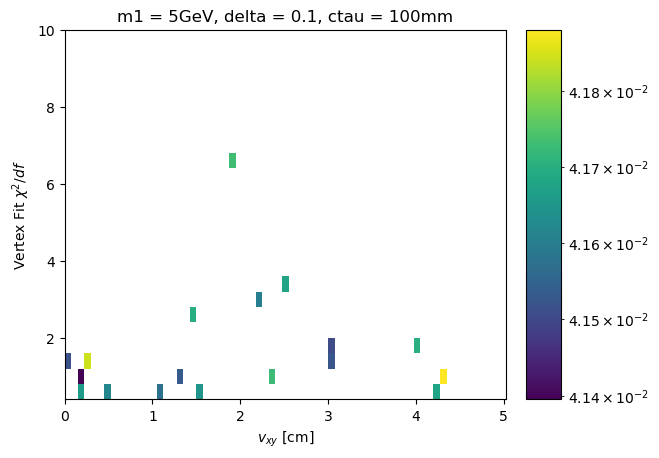

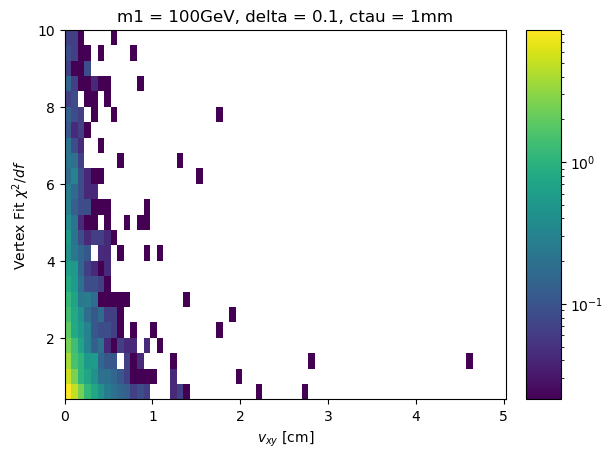

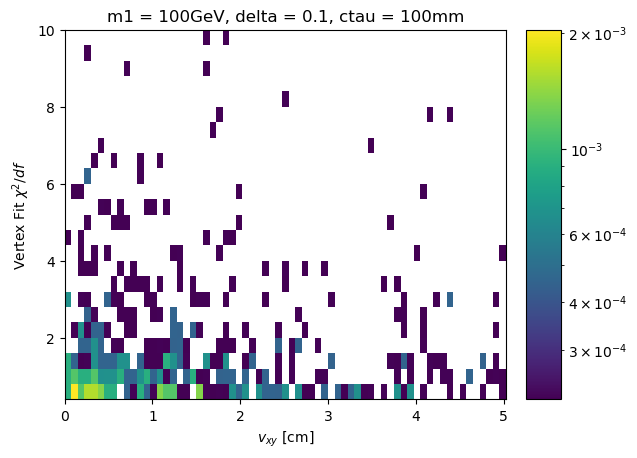

In [178]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_chi2',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 3j,
    'yrebin': 2j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 10],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

Text(0.5, 1.0, 'All Background')

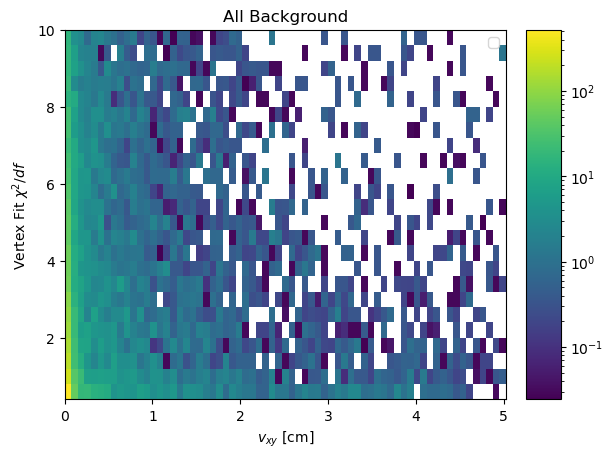

In [179]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_chi2',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 3j,
    'yrebin': 2j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 10],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

fig, ax = plt.subplots()

utils.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict)

plt.title('All Background')
#utils.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, processes = ['Z+jets', 'W+jets', 'DY'])


### sel_vtx_vxy_vs_sel_vtx_dR

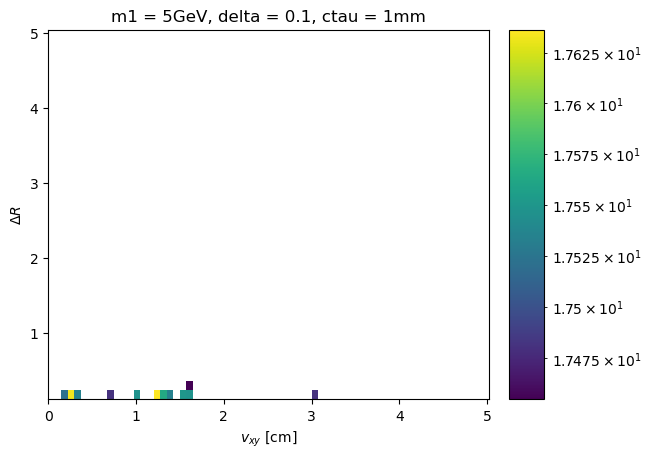

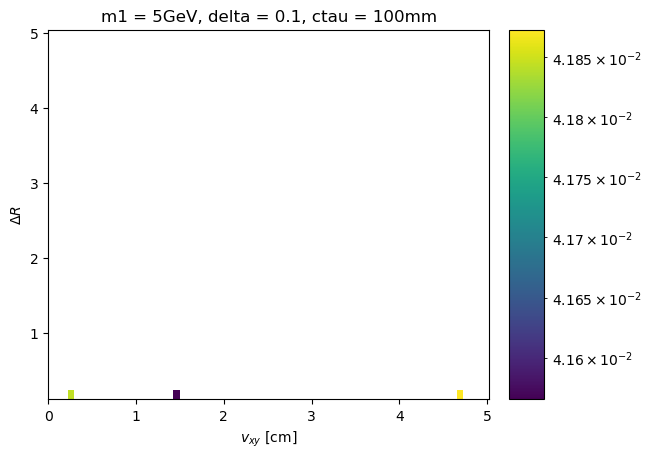

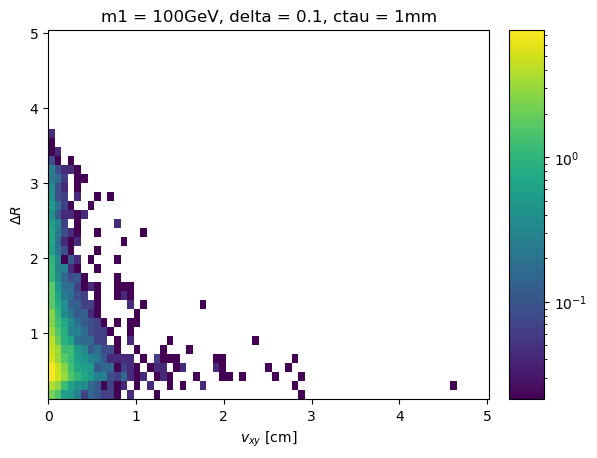

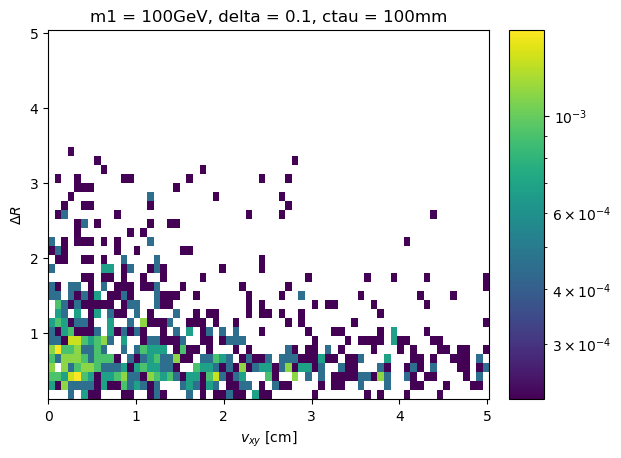

In [201]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_dR',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 3j,
    'yrebin': 2j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

Text(0.5, 1.0, 'All Background')

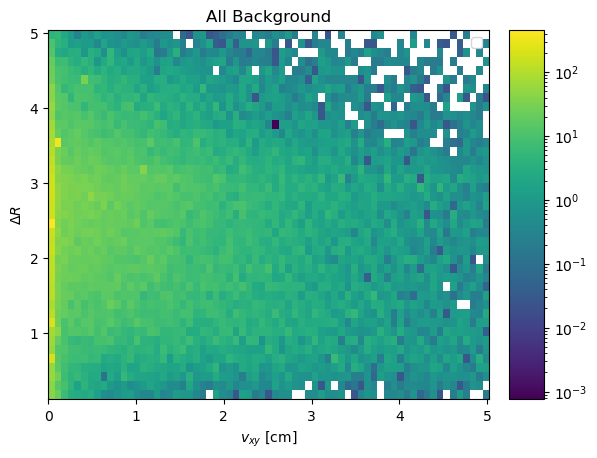

In [204]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_dR',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 3j,
    'yrebin': 2j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

fig, ax = plt.subplots()

utils.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict)

plt.title('All Background')
#utils.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, processes = ['Z+jets', 'W+jets', 'DY'])


### sel_vtx_vxy_vs_sel_vtx_mass

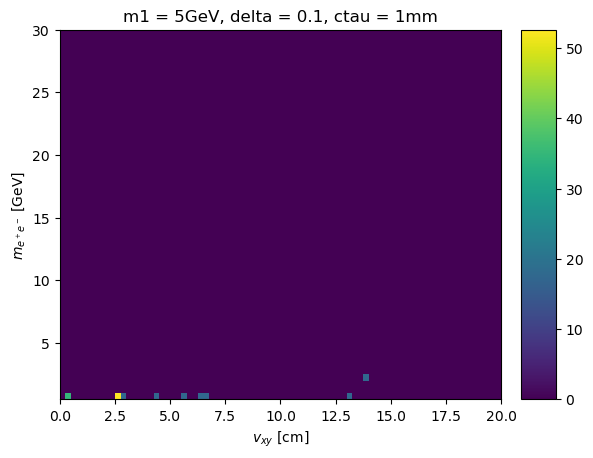

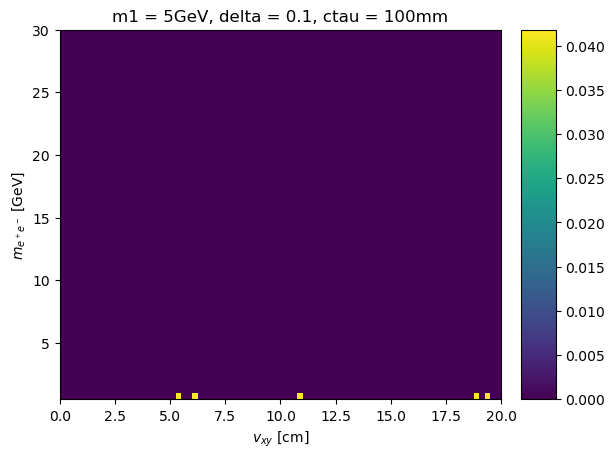

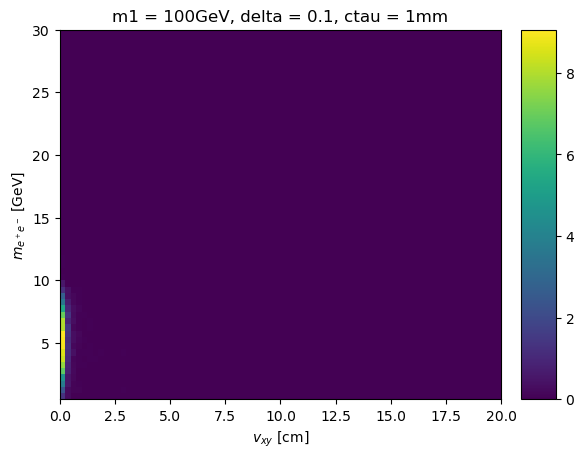

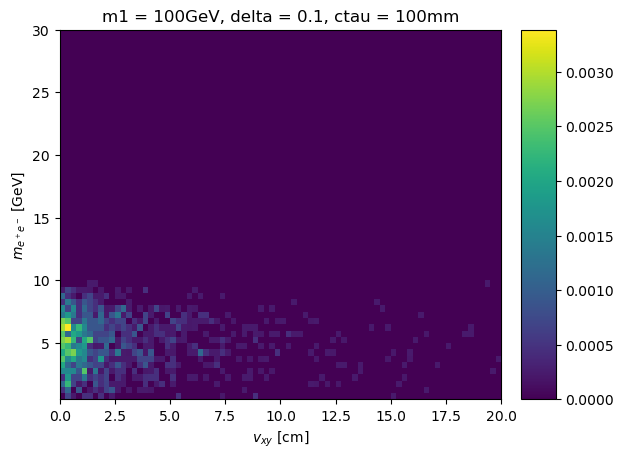

In [130]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_mass',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 30],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_sel_vtx_METdPhi

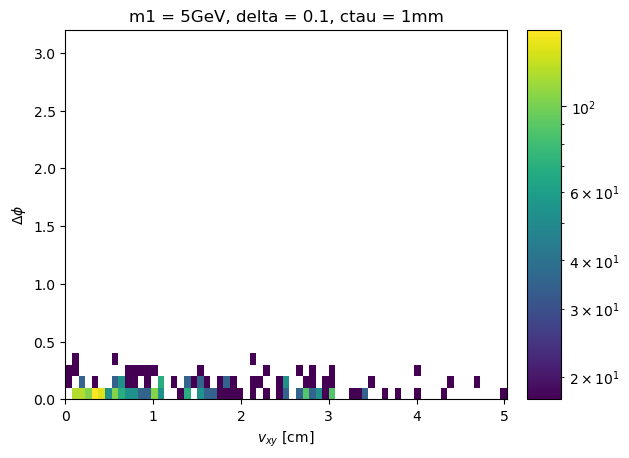

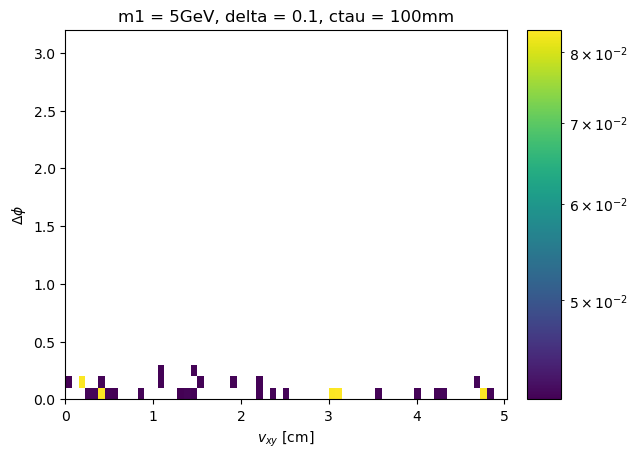

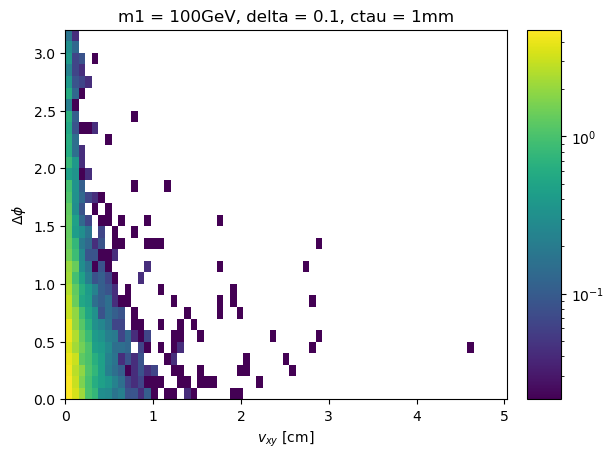

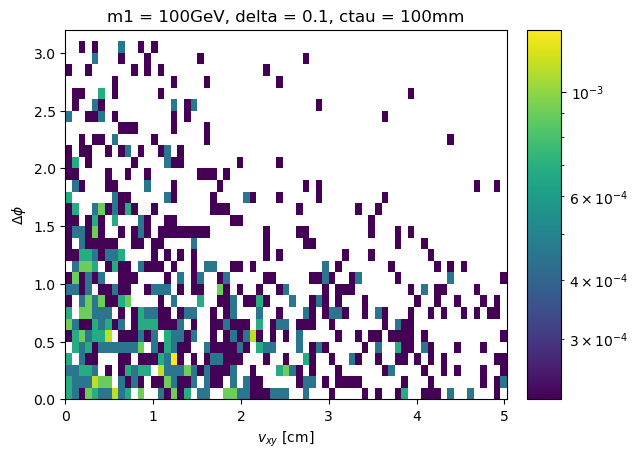

In [196]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_METdPhi',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 3j,
    'yrebin': 2j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

Text(0.5, 1.0, 'All Background')

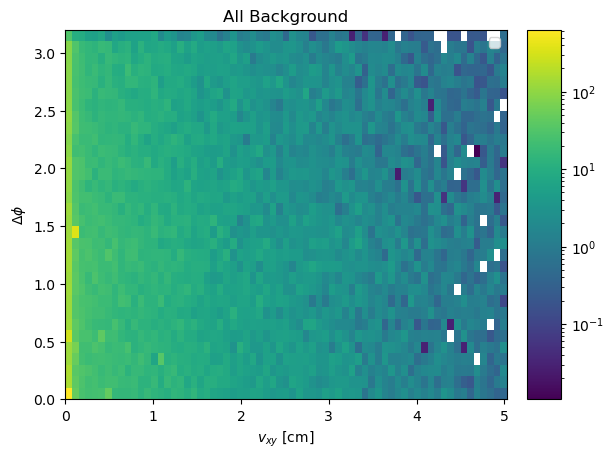

In [195]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_METdPhi',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 3j,
    'yrebin': 2j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

fig, ax = plt.subplots()

utils.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict)

plt.title('All Background')
#utils.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, processes = ['Z+jets', 'W+jets', 'DY'])


### sel_vtx_vxy_vs_sel_vtx_vxySignif

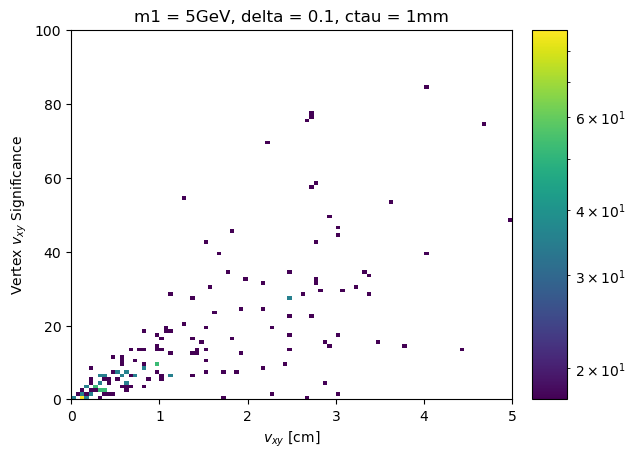

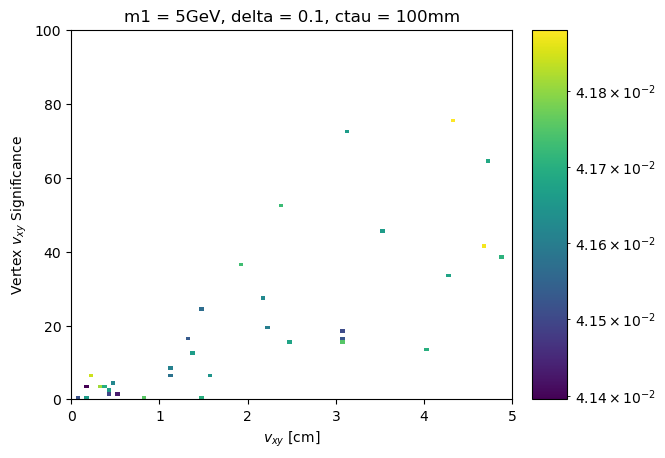

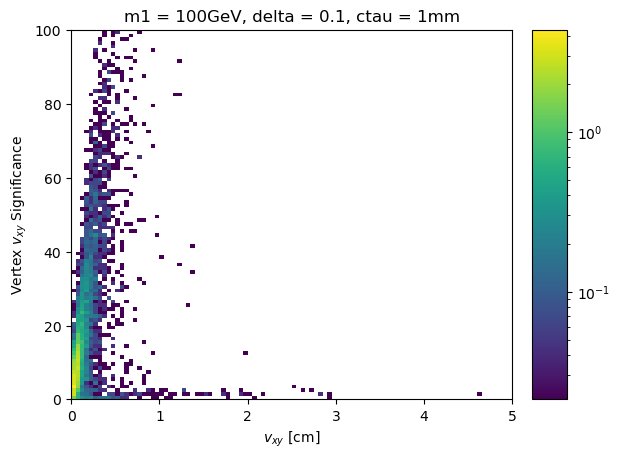

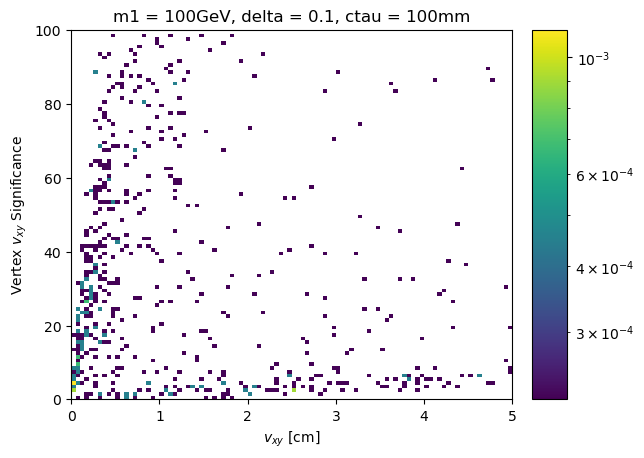

In [186]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_vxySignif',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 1j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

Text(0.5, 1.0, 'All Background')

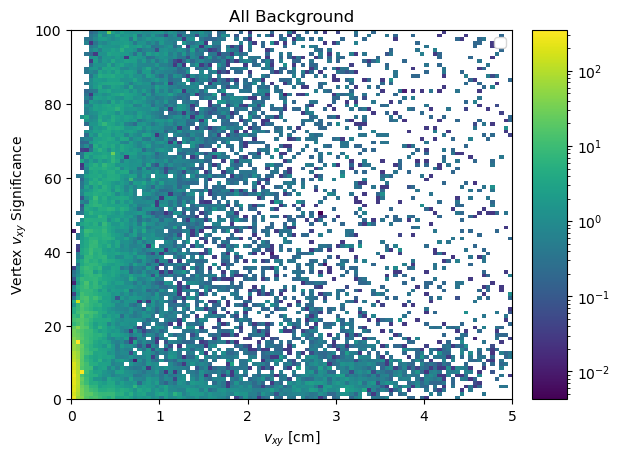

In [187]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_vxySignif',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 1j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

fig, ax = plt.subplots()

utils.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict)

plt.title('All Background')
#utils.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, processes = ['Z+jets', 'W+jets', 'DY'])


### sel_vtx_vxy_vs_sel_vtx_pt

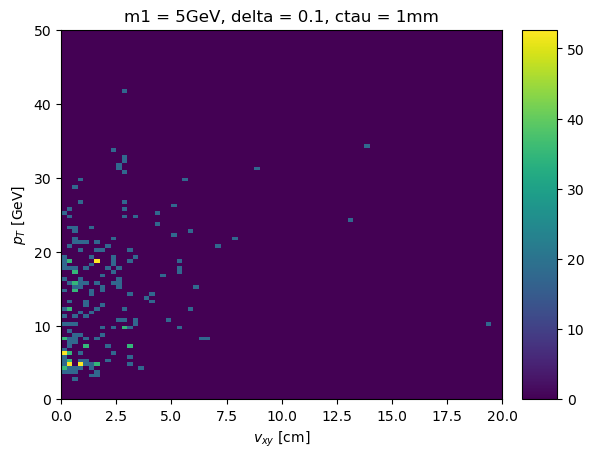

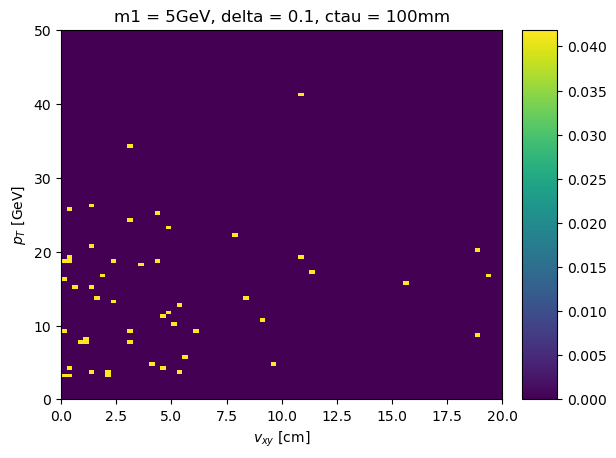

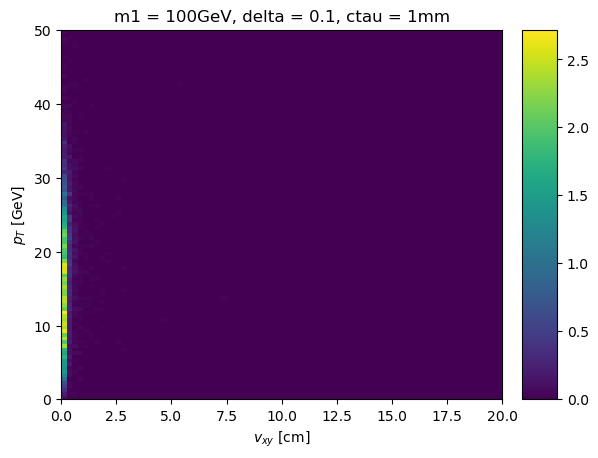

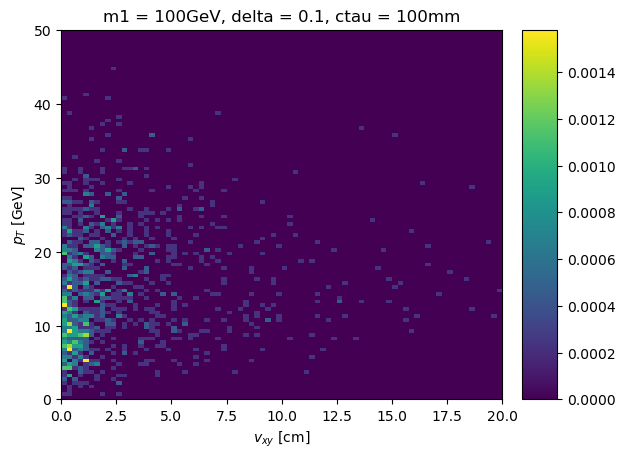

In [133]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_pt',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_sel_vtx_sign_eta

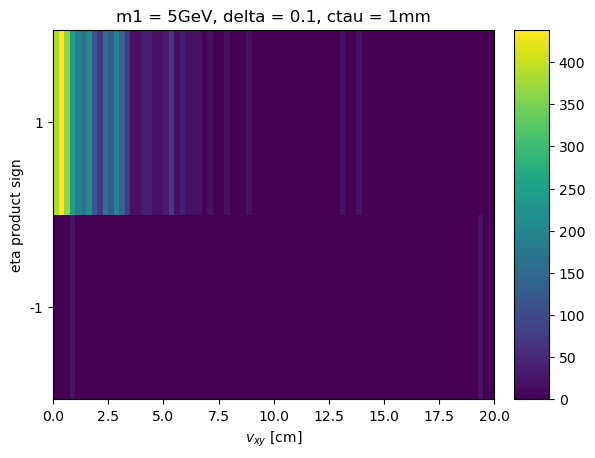

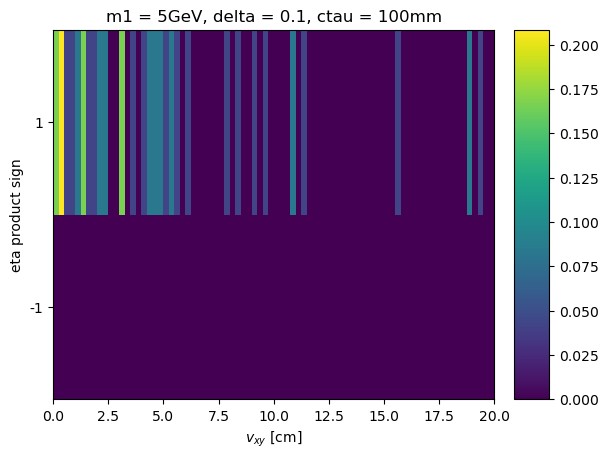

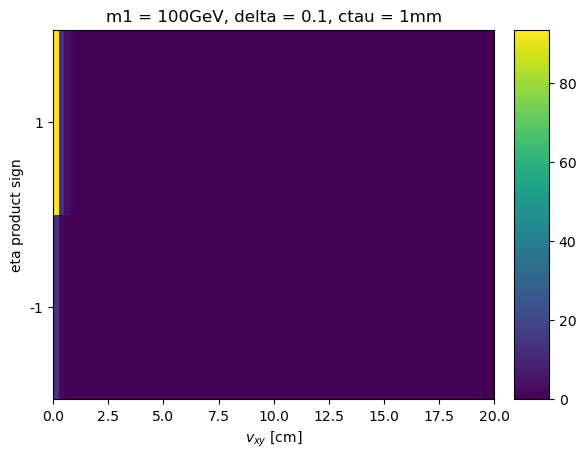

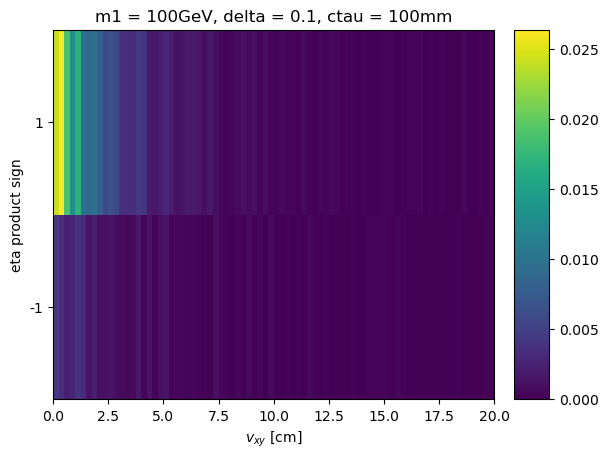

In [134]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_sign_eta',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_matchType

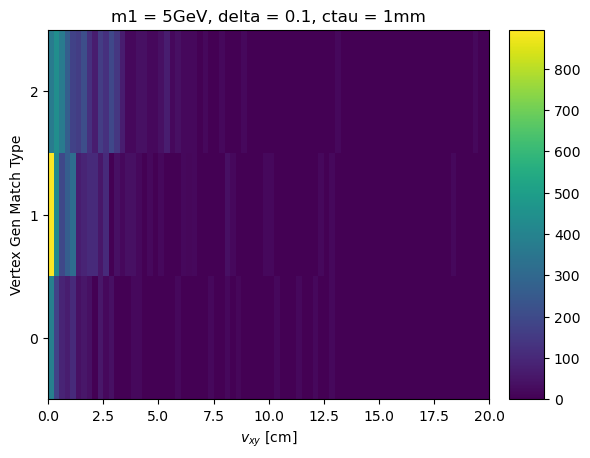

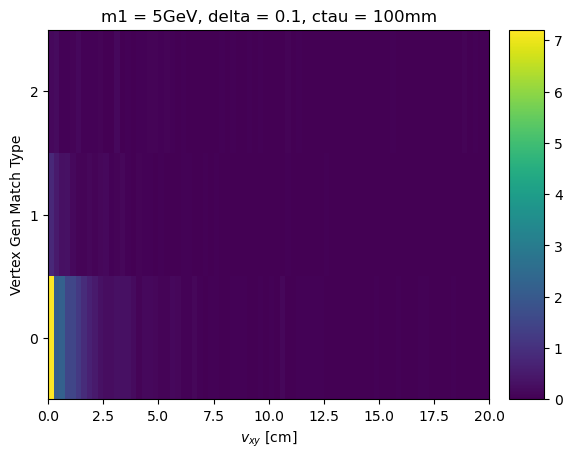

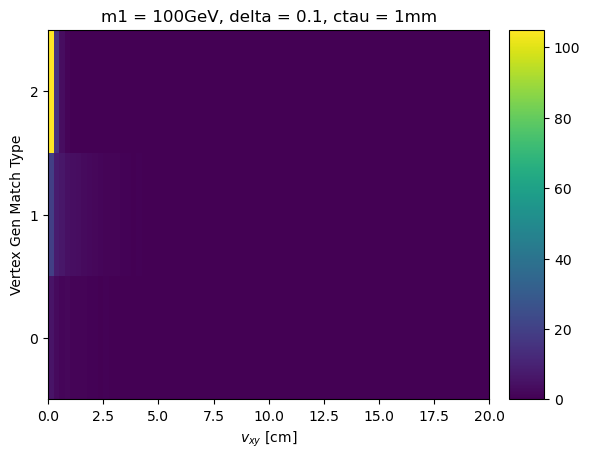

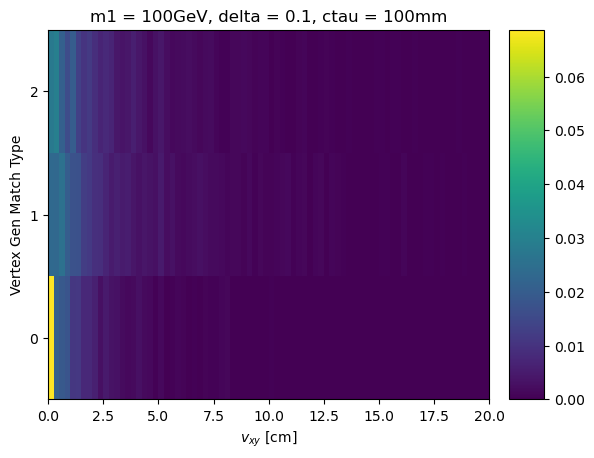

In [135]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_minDxy_vs_matchType

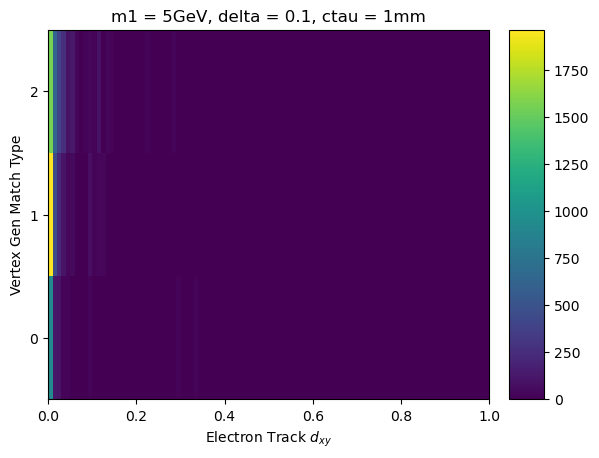

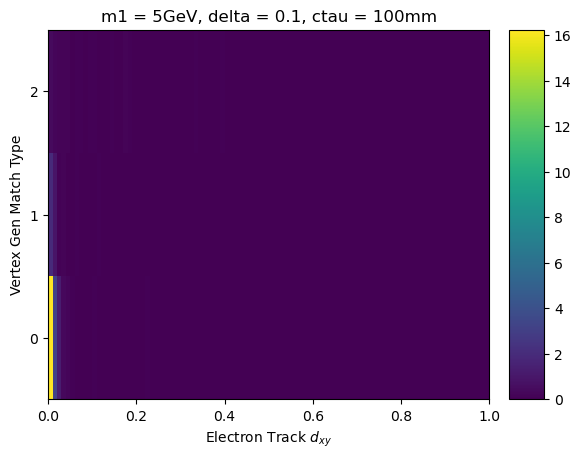

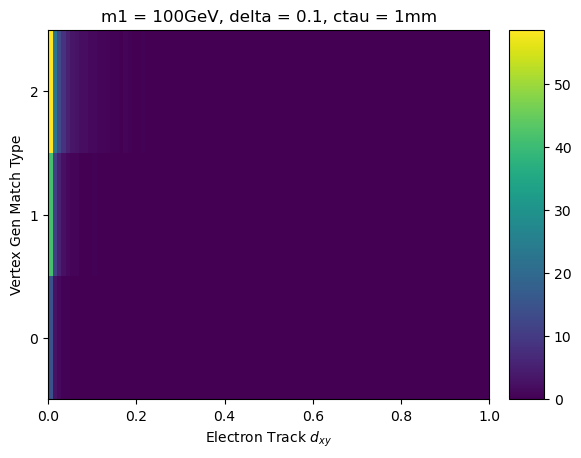

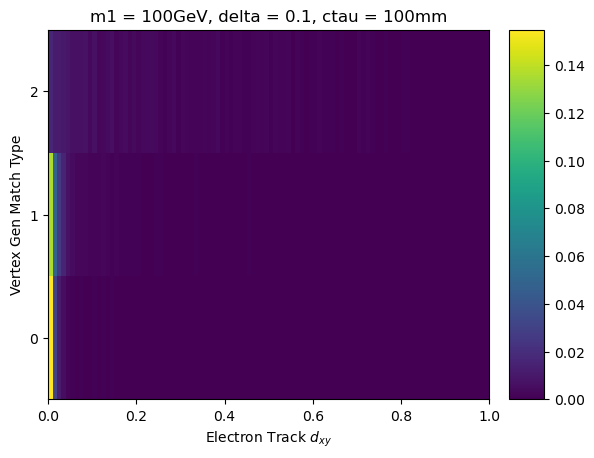

In [136]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDxy_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_minDz_vs_matchType

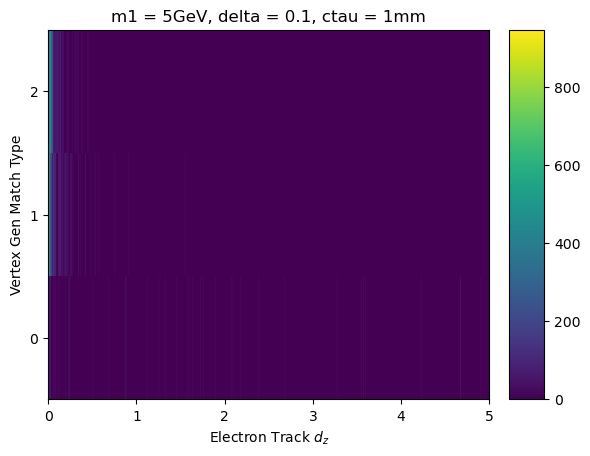

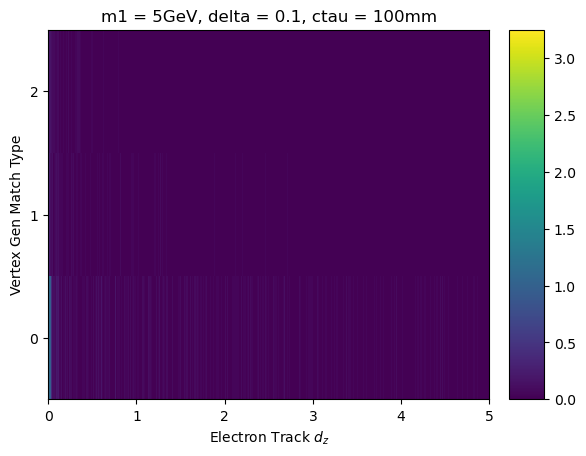

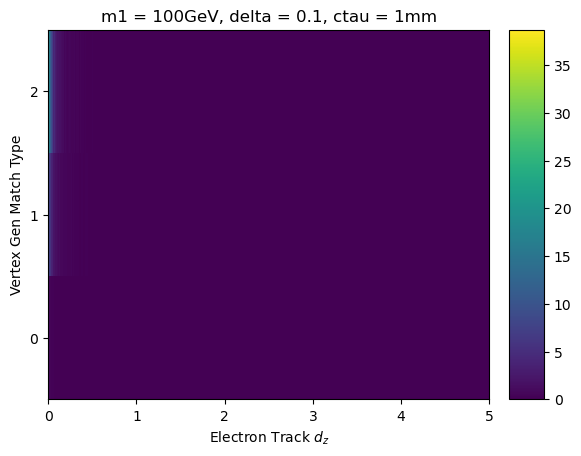

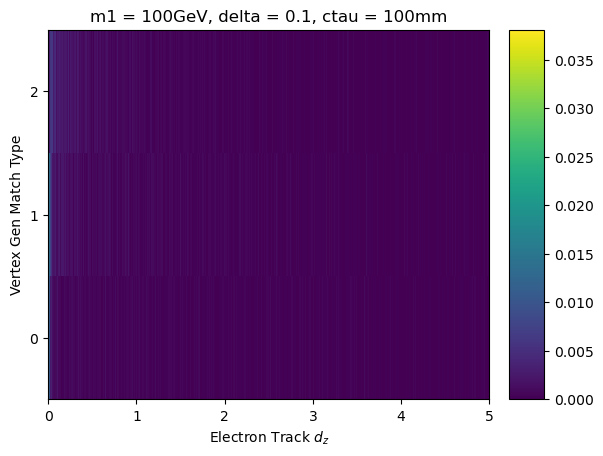

In [137]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDz_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_deltaDxy_vs_matchType

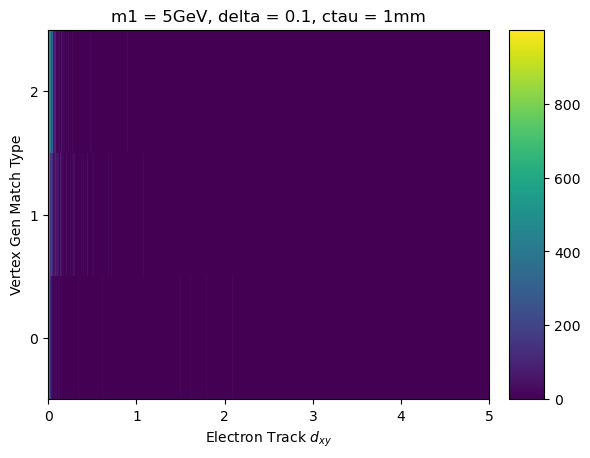

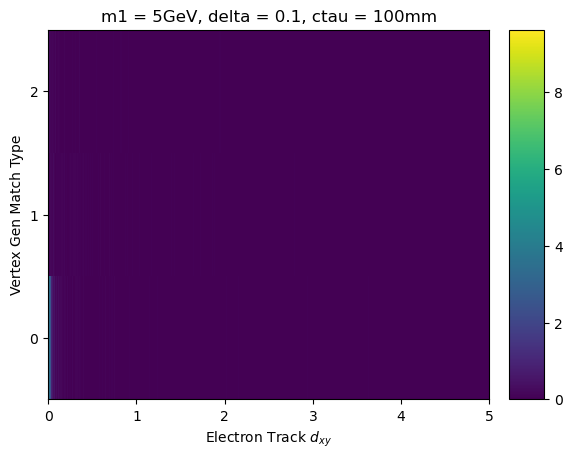

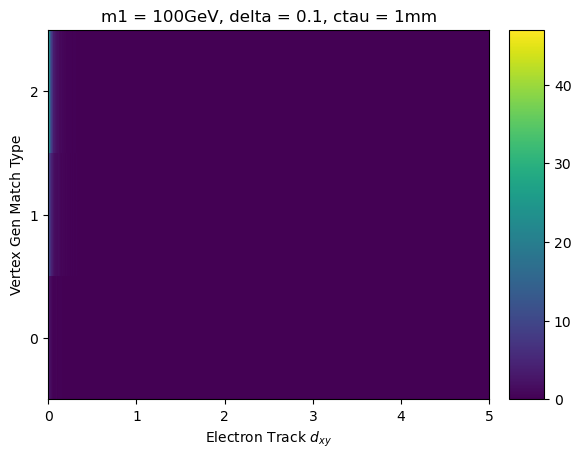

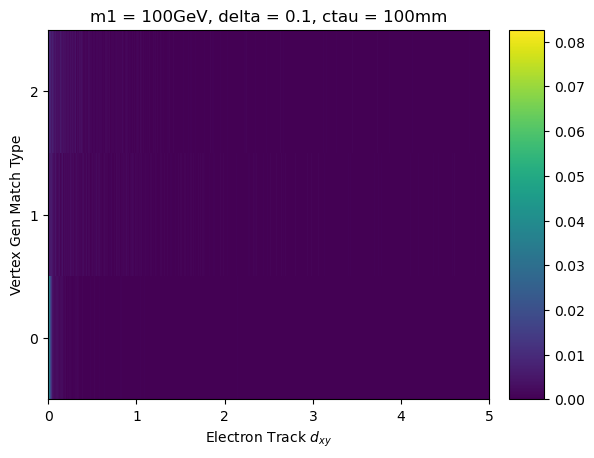

In [138]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_deltaDxy_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_deltaDz_vs_matchType

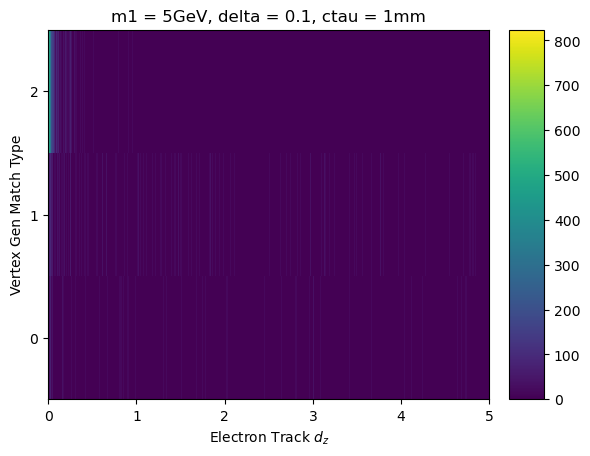

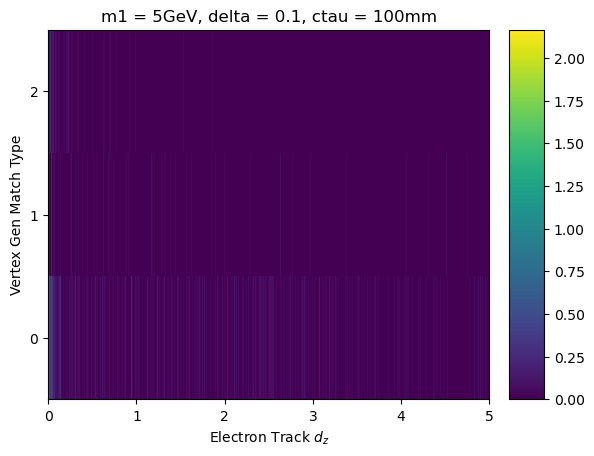

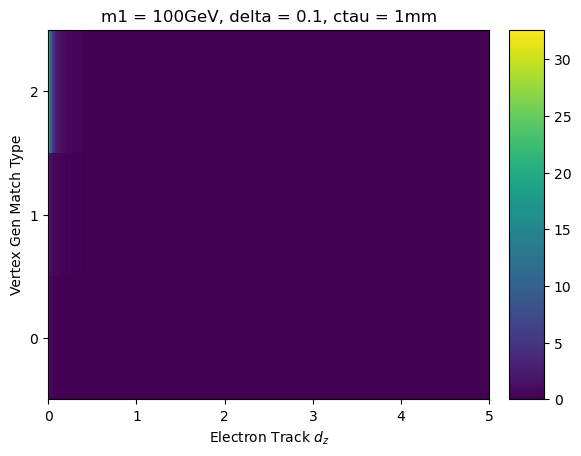

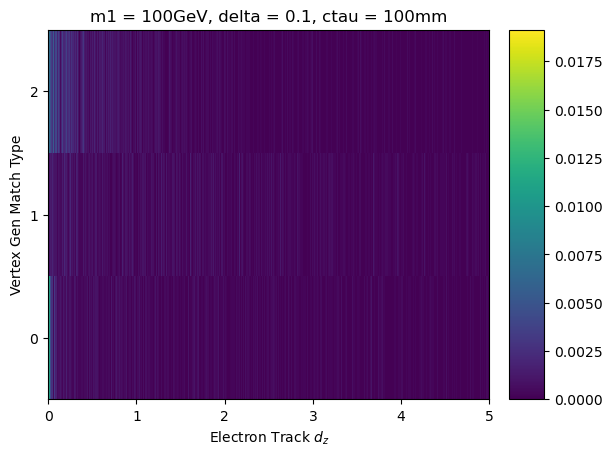

In [139]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_deltaDz_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxySignif_vs_matchType

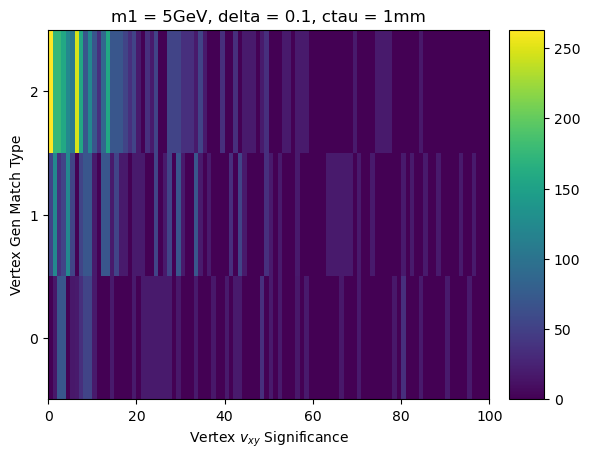

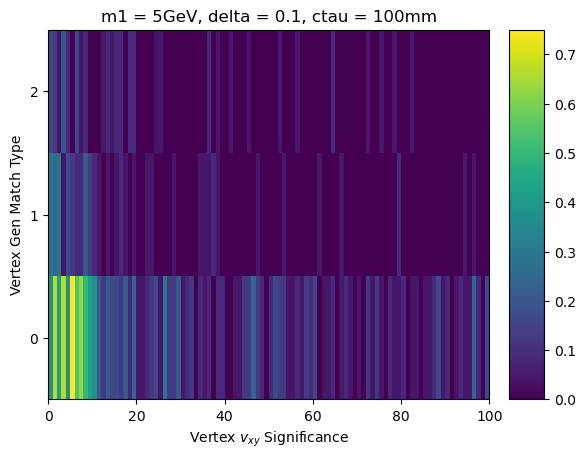

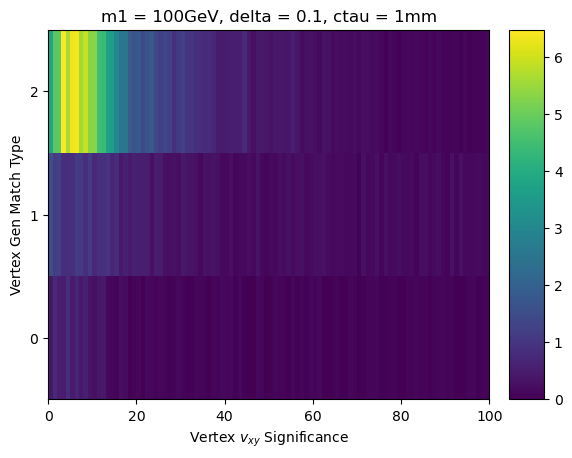

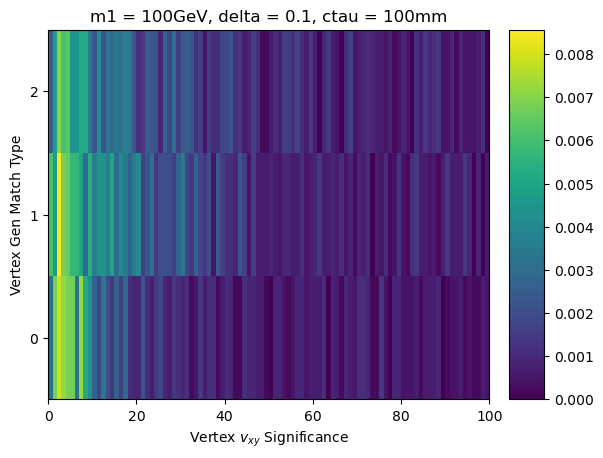

In [140]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxySignif_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_chi2_vs_matchType

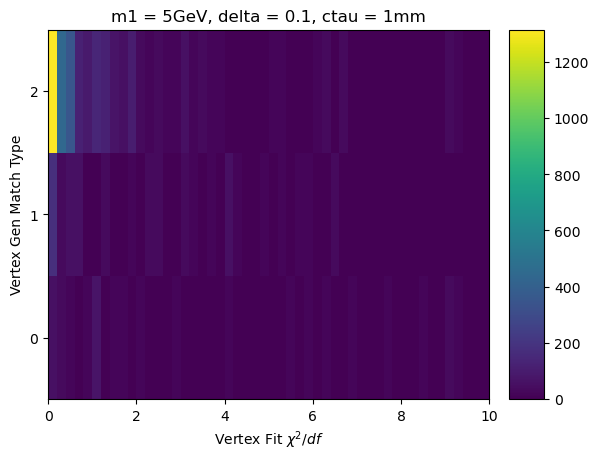

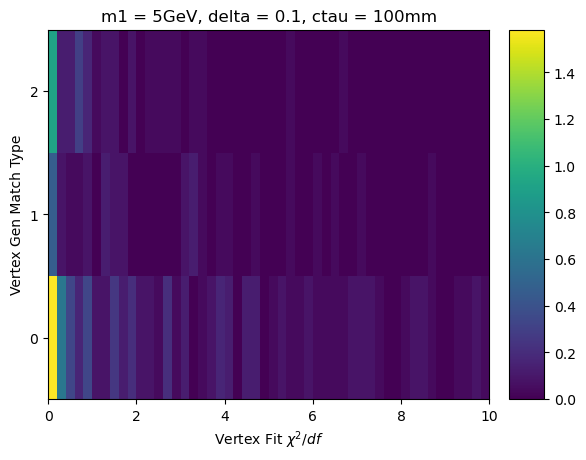

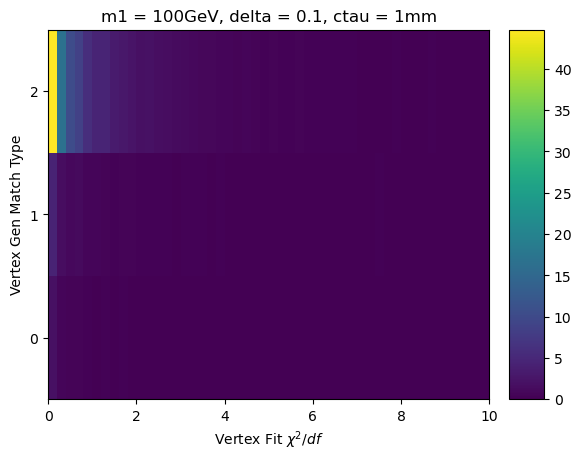

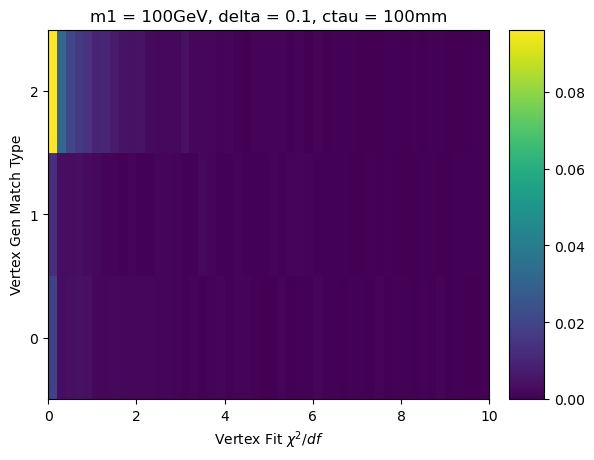

In [141]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_chi2_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': [0,10],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_dR_vs_matchType

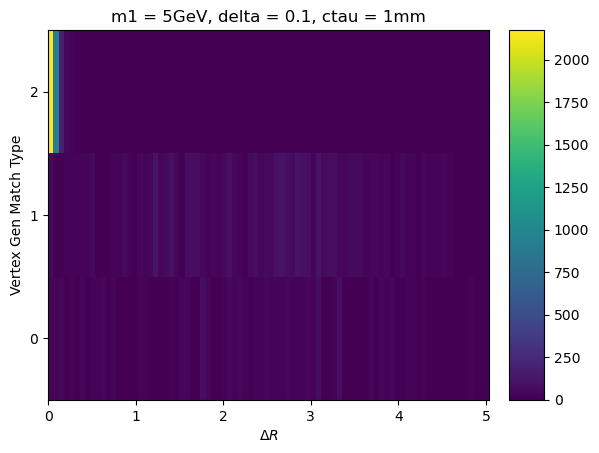

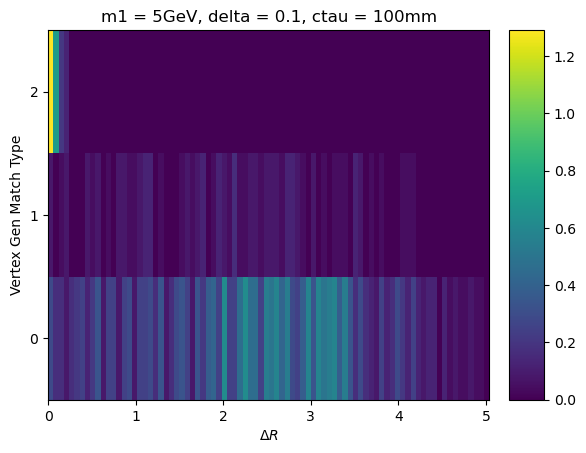

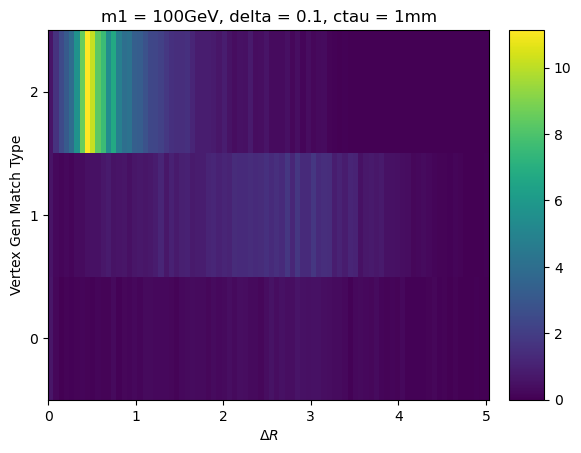

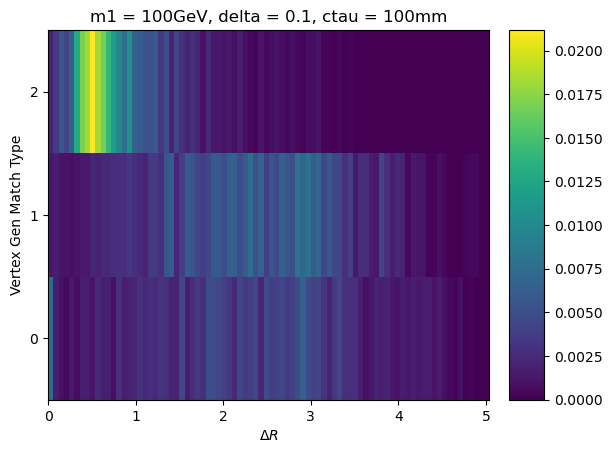

In [142]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dR_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_dEta_vs_matchType

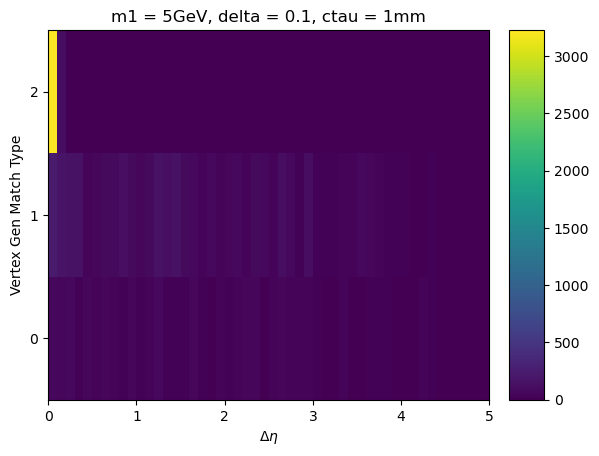

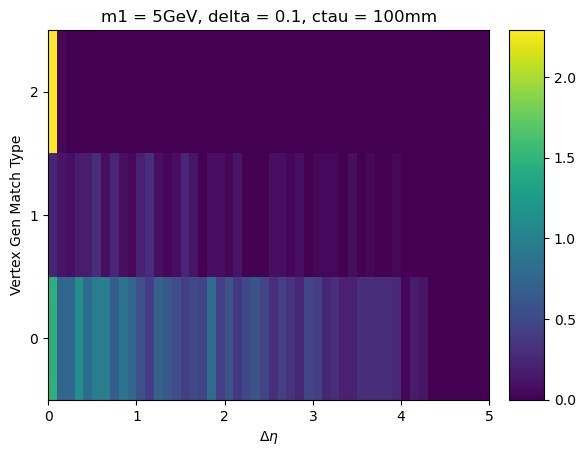

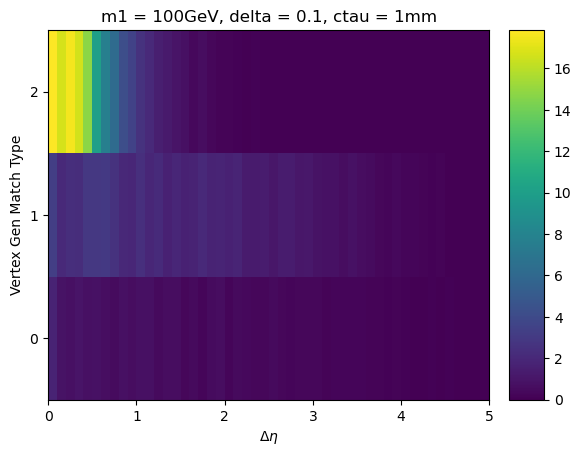

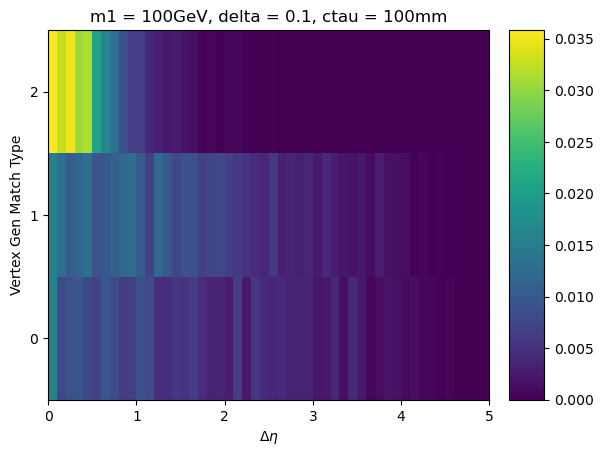

In [143]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dEta_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_dPhi_vs_matchType

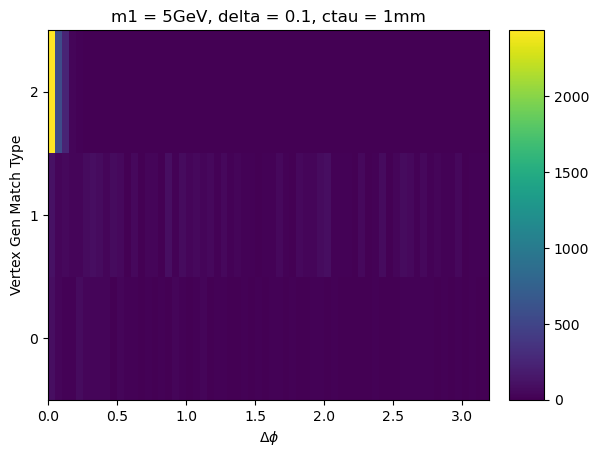

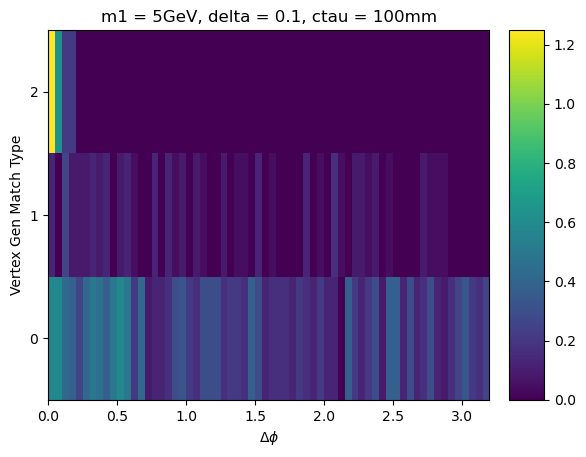

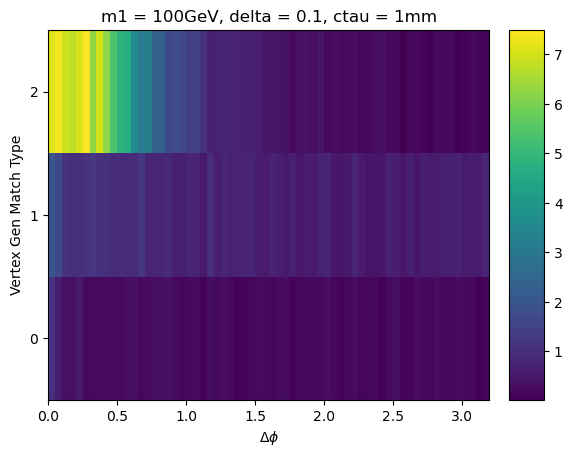

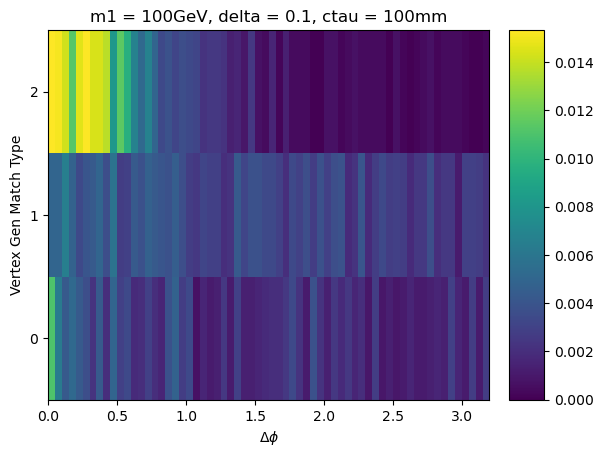

In [144]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dPhi_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_sign_eta_vs_matchType

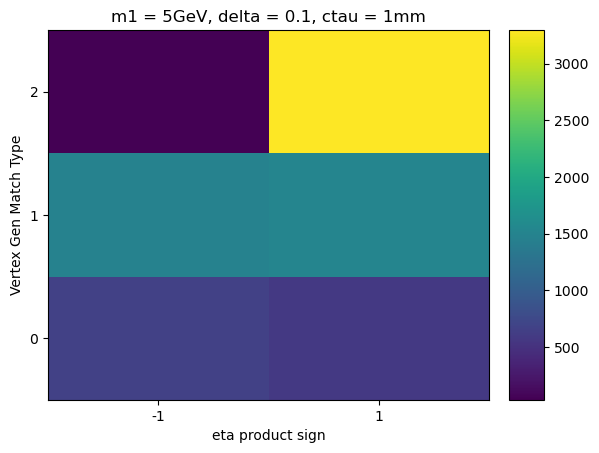

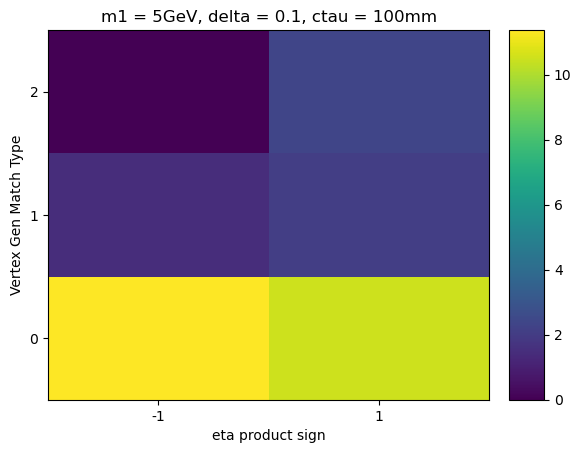

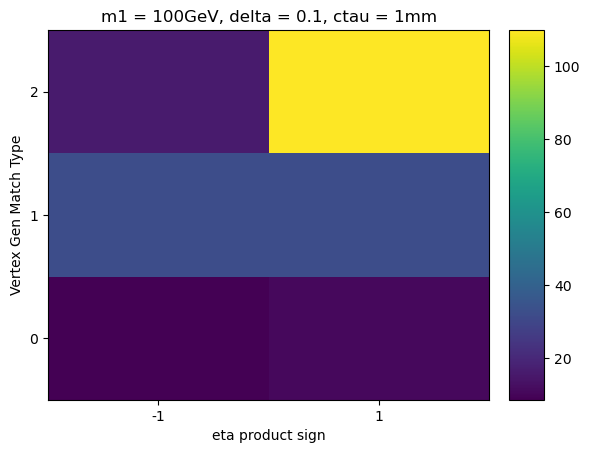

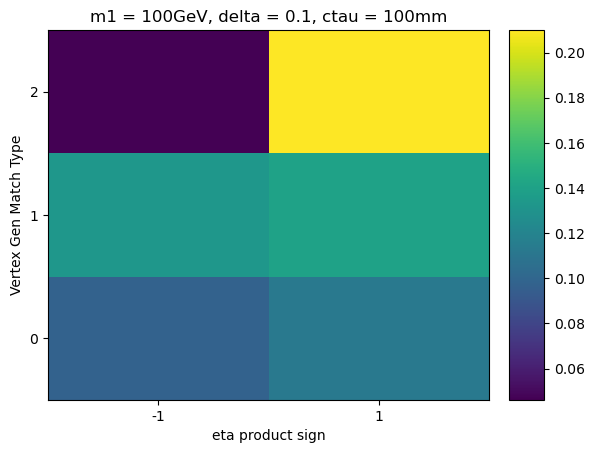

In [145]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_sign_eta_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_pt_vs_matchType

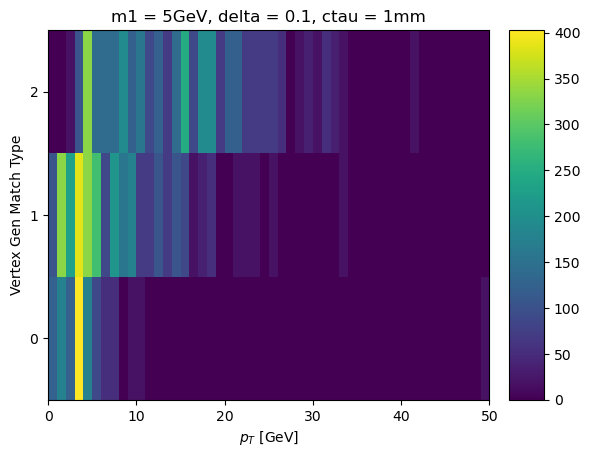

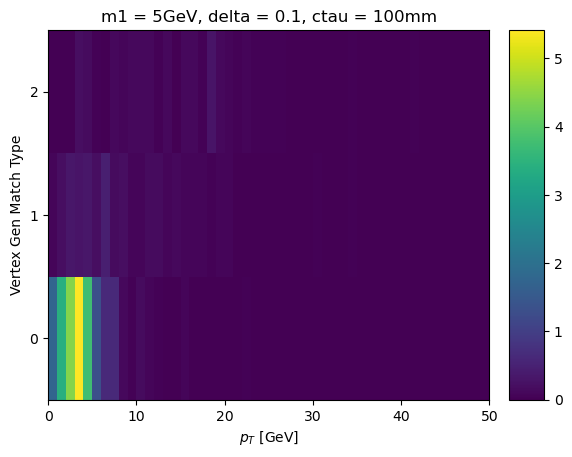

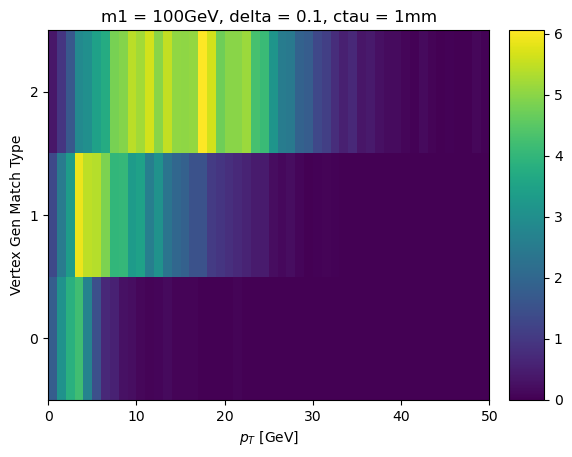

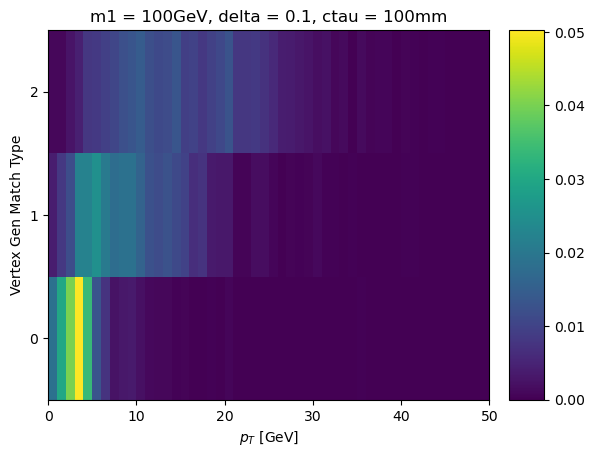

In [146]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_pt_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_eta_vs_matchType

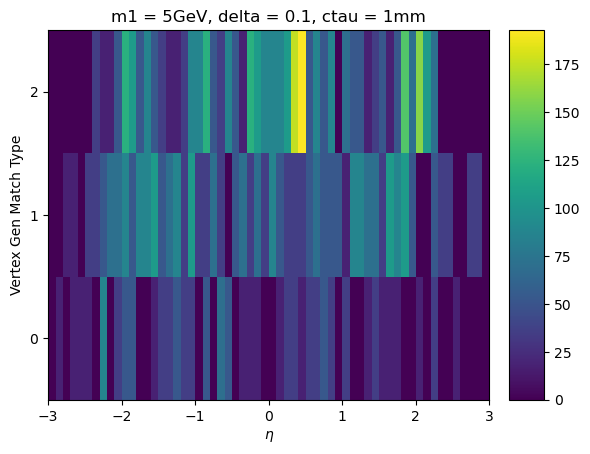

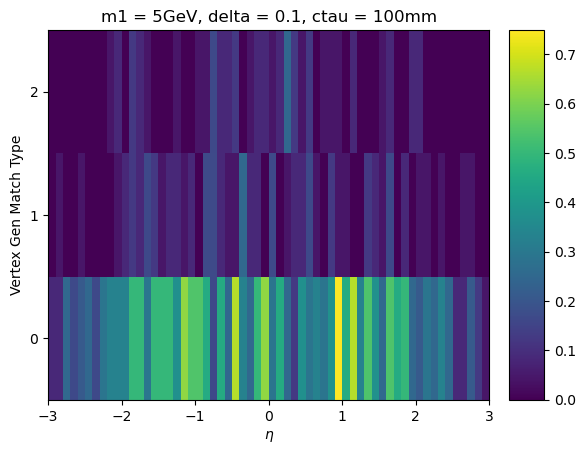

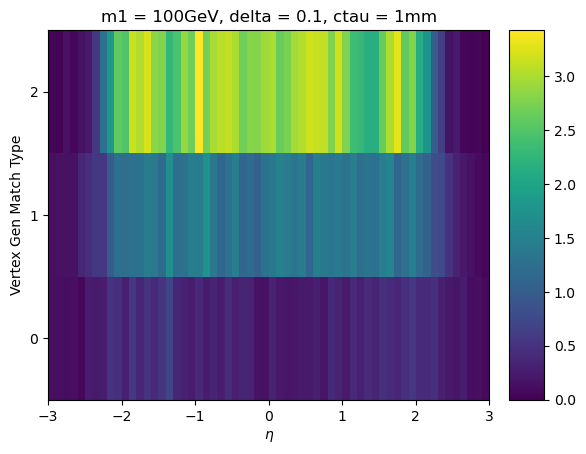

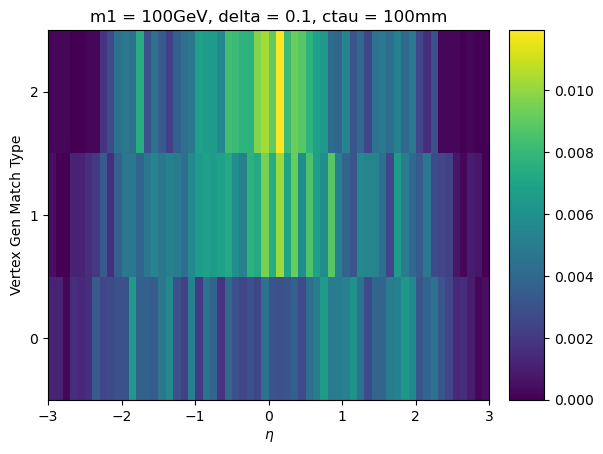

In [147]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_eta_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_phi_vs_matchType

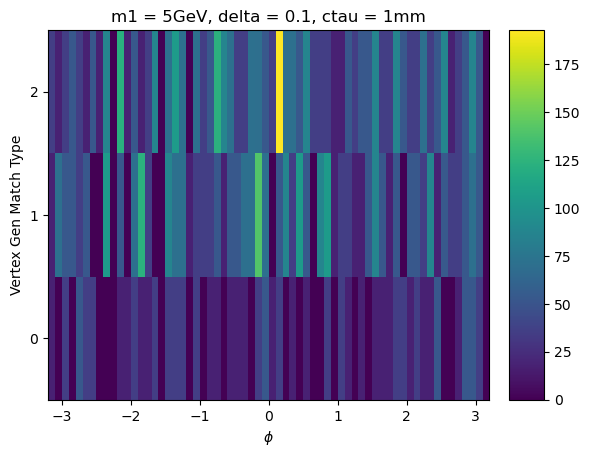

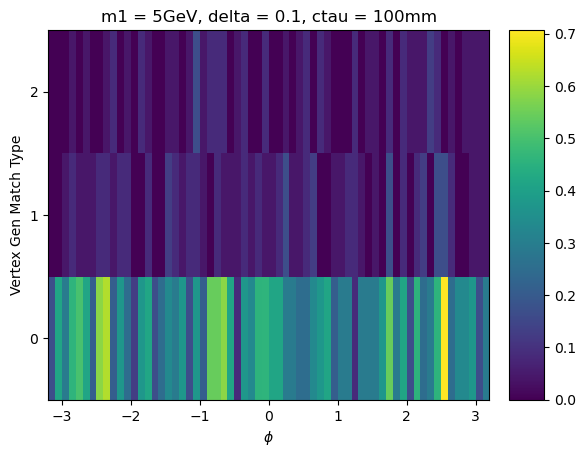

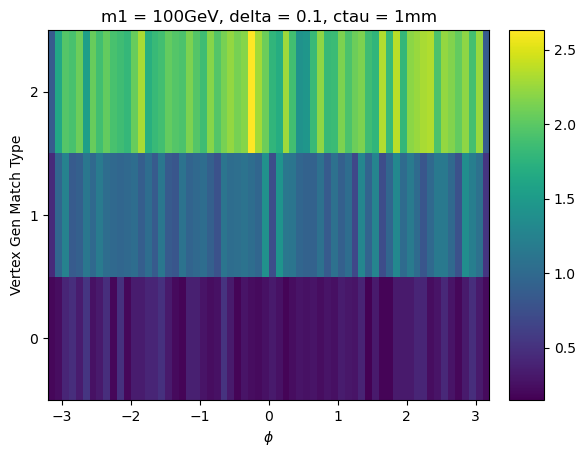

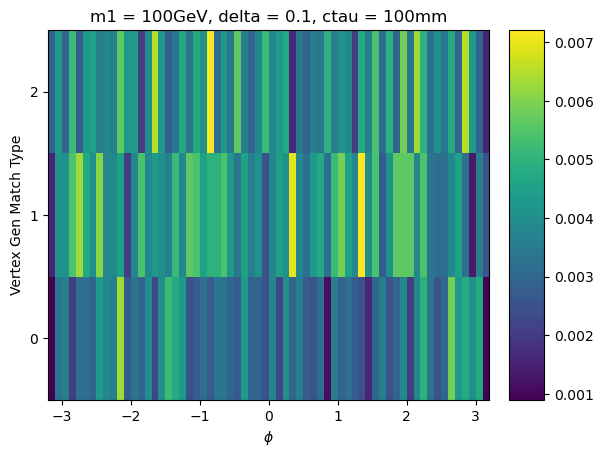

In [148]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_phi_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_mass_vs_matchType

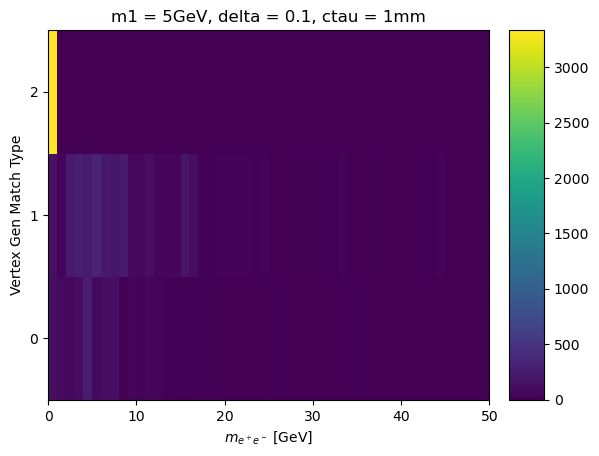

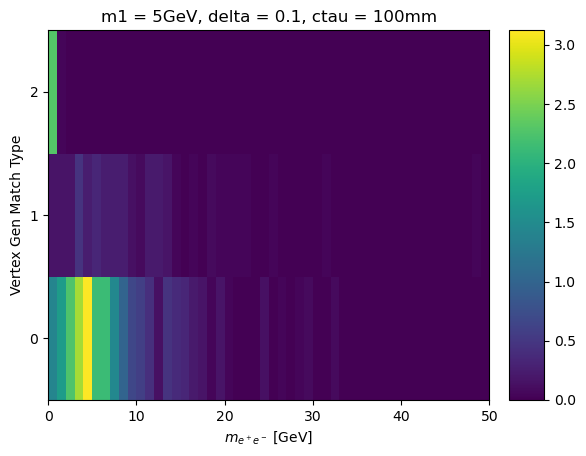

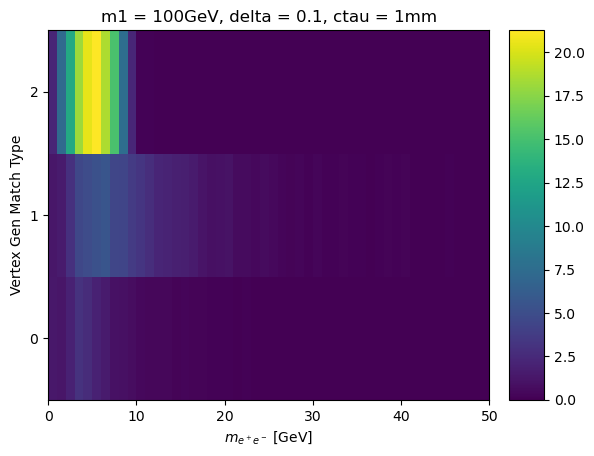

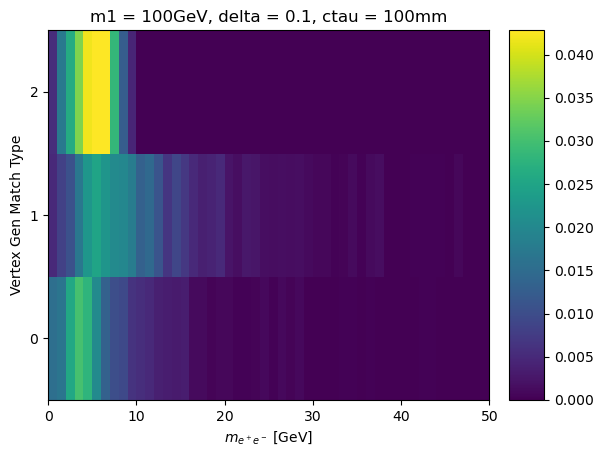

In [149]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_type_vs_matchType

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_type_vs_matchType',
    'cut': 'cut9',
}
style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [50]
deltas = [0.2]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()